### FINAL PROJECT- ANAYLZING ONLINE SHOPPER INTENTIONS AND FIGURING OUT DIFFERENT CUSTOMER SEGMENTS.

### 1. Importing Libraries

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

### 2. Loading Dataset

In [2]:
#Load Dataset
data = pd.read_csv("online_shoppers_intention.csv")
print (data.columns)
data.head(10)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   
5             0.0                      0.0            0.0   
6             0.0                     -1.0            0.0   
7             1.0                     -1.0            0.0   
8             0.0                      0.0            0.0   
9             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   
5                     0.0            19.0               154.216667   
6                    -1.0             1.0                -1.000000   
7                    -1.0             1.0                -1.000000   
8                     0.0             2.0                37.000000   
9                     0.0             3.0               738.000000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0     0.200000   0.200000         0.0         0.0   Feb                 1   
1     0.000000   0.100000         0.0         0.0   Feb                 2   
2     0.200000   0.200000         0.0         0.0   Feb                 4   
3     0.050000   0.140000         0.0         0.0   Feb                 3   
4     0.020000   0.050000         0.0         0.0   Feb                 3   
5     0.015789   0.024561         0.0         0.0   Feb                 2   
6     0.200000   0.200000         0.0         0.4   Feb                 2   
7     0.200000   0.200000         0.0         0.0   Feb                 1   
8     0.000000   0.100000         0.0         0.8   Feb                 2   
9     0.000000   0.022222         0.0         0.4   Feb                 2   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False  
5        2       1            3  Returning_Visitor    False    False  
6        4       3            3  Returning_Visitor    False    False  
7        2       1            5  Returning_Visitor     True    False  
8        2       2            3  Returning_Visitor    False    False  
9        4       1            2  Returning_Visitor    False    False

In [3]:
print("Shape: ",data.shape)

Shape:  (12330, 18)


In [4]:
#Checking datatypes of columns and number of not null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [5]:
#finding out number of null values
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

###### Above result shows that following columns have 14 null values each.


In [6]:
data[pd.isnull(data).any(axis=1)]

Administrative  Administrative_Duration  Informational  \
1065             NaN                      NaN            NaN   
1132             NaN                      NaN            NaN   
1133             NaN                      NaN            NaN   
1134             NaN                      NaN            NaN   
1135             NaN                      NaN            NaN   
1136             NaN                      NaN            NaN   
1473             NaN                      NaN            NaN   
1474             NaN                      NaN            NaN   
1475             NaN                      NaN            NaN   
1476             NaN                      NaN            NaN   
2037             NaN                      NaN            NaN   
2038             NaN                      NaN            NaN   
2039             NaN                      NaN            NaN   
2753             NaN                      NaN            NaN   

      Informational_Duration  ProductRelated  ProductRelated_Duration  \
1065                     NaN             NaN                      NaN   
1132                     NaN             NaN                      NaN   
1133                     NaN             NaN                      NaN   
1134                     NaN             NaN                      NaN   
1135                     NaN             NaN                      NaN   
1136                     NaN             NaN                      NaN   
1473                     NaN             NaN                      NaN   
1474                     NaN             NaN                      NaN   
1475                     NaN             NaN                      NaN   
1476                     NaN             NaN                      NaN   
2037                     NaN             NaN                      NaN   
2038                     NaN             NaN                      NaN   
2039                     NaN             NaN                      NaN   
2753                     NaN             NaN                      NaN   

      BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
1065          NaN        NaN         0.0         0.0   Mar                 2   
1132          NaN        NaN         0.0         0.0   Mar                 1   
1133          NaN        NaN         0.0         0.0   Mar                 2   
1134          NaN        NaN         0.0         0.0   Mar                 2   
1135          NaN        NaN         0.0         0.0   Mar                 3   
1136          NaN        NaN         0.0         0.0   Mar                 2   
1473          NaN        NaN         0.0         0.0   Mar                 2   
1474          NaN        NaN         0.0         0.0   Mar                 1   
1475          NaN        NaN         0.0         0.0   Mar                 2   
1476          NaN        NaN         0.0         0.0   Mar                 1   
2037          NaN        NaN         0.0         0.0   Mar                 3   
2038          NaN        NaN         0.0         0.0   Mar                 2   
2039          NaN        NaN         0.0         0.0   Mar                 3   
2753          NaN        NaN         0.0         0.0   May                 2   

      Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
1065        2       2            1  Returning_Visitor    False    False  
1132        1       1            2  Returning_Visitor    False    False  
1133        4       5            1  Returning_Visitor    False    False  
1134        2       1            2  Returning_Visitor    False    False  
1135        2       1            1  Returning_Visitor    False    False  
1136        2       1            2  Returning_Visitor    False    False  
1473        2       1            1  Returning_Visitor     True    False  
1474        1       6            1  Returning_Visitor     True    False  
1475        2       3            1  Returning_Visitor    False    False  
1476    

###### the above result shows the rows containing null values which should be removed


In [7]:
data.dropna(axis="rows",inplace=True)

In [8]:
data.reset_index(drop=True, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

In [10]:
columns = data.columns
for col in columns:
    print(f'{col}: {data[col].unique()} \n')

Administrative: [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. 24. 22. 21. 20. 23. 27. 26.] 

Administrative_Duration: [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429] 

Informational: [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7.  9. 10.  8. 11. 24. 13.] 

Informational_Duration: [  0.    -1.   120.   ... 547.75 368.25 211.25] 

ProductRelated: [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60. 104. 129.  77.  74.
  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.  95.
 130. 151. 117. 124. 127

In [11]:
#removing negative values
data = data[data['Administrative_Duration']>=0]

In [12]:
# changing data types
data["OperatingSystems"]=data["OperatingSystems"].astype('category')
data["Browser"]=data["Browser"].astype('category')
data["Region"]=data["Region"].astype('category')
data["TrafficType"]=data["TrafficType"].astype('category')
data["VisitorType"]=data["VisitorType"].astype('category')
data["Month"]=data["Month"].astype('category')
data["Weekend"]=data["Weekend"].astype('category')
data["Revenue"]=data["Revenue"].astype('category')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12315
Data columns (total 18 columns):
Administrative             12283 non-null float64
Administrative_Duration    12283 non-null float64
Informational              12283 non-null float64
Informational_Duration     12283 non-null float64
ProductRelated             12283 non-null float64
ProductRelated_Duration    12283 non-null float64
BounceRates                12283 non-null float64
ExitRates                  12283 non-null float64
PageValues                 12283 non-null float64
SpecialDay                 12283 non-null float64
Month                      12283 non-null category
OperatingSystems           12283 non-null category
Browser                    12283 non-null category
Region                     12283 non-null category
TrafficType                12283 non-null category
VisitorType                12283 non-null category
Weekend                    12283 non-null category
Revenue                    12283 n

### 3)EDA and Outliers Detection

In [14]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12283.000000             12283.000000   12283.000000   
mean         2.323862                81.126229       0.505333   
std          3.325128               177.046838       1.272138   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 8.000000       0.000000   
75%          4.000000                93.950000       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12283.000000    12283.000000             12283.000000   
mean                34.601780       31.846536              1199.253065   
std                141.002498       44.521443              1915.935446   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               187.100000   
50%                  0.000000       18.000000               602.500000   
75%                  0.000000       38.000000              1470.909852   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  
count  12283.000000  12283.000000  12283.000000  12283.000000  
mean       0.021723      0.042611      5.911793      0.061532  
std        0.047686      0.047964     18.600350      0.199122  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000      0.000000  
50%        0.003077      0.025000      0.000000      0.000000  
75%        0.016667      0.050000      0.000000      0.000000  
max        0.200000      0.200000    361.763742      1.000000

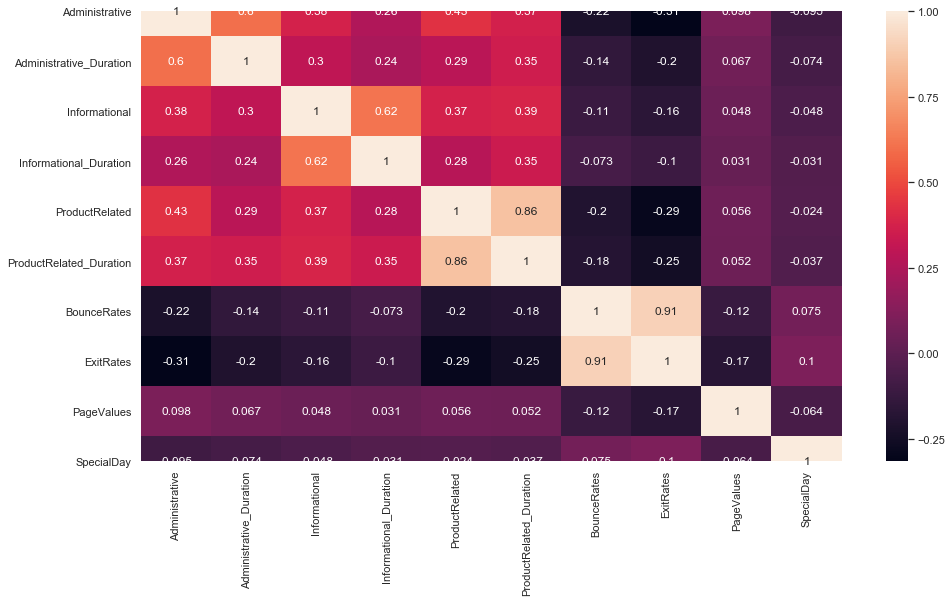

In [15]:
corr = data.corr()
sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.heatmap(corr, annot=True)

<b>The above result shows the realationship between features. The orange color shows the positive relationship between features like revenue and page value have positive ralationship. The dark purple color shows negative corelation like exit rates and product related duration have negative relationship
</b>

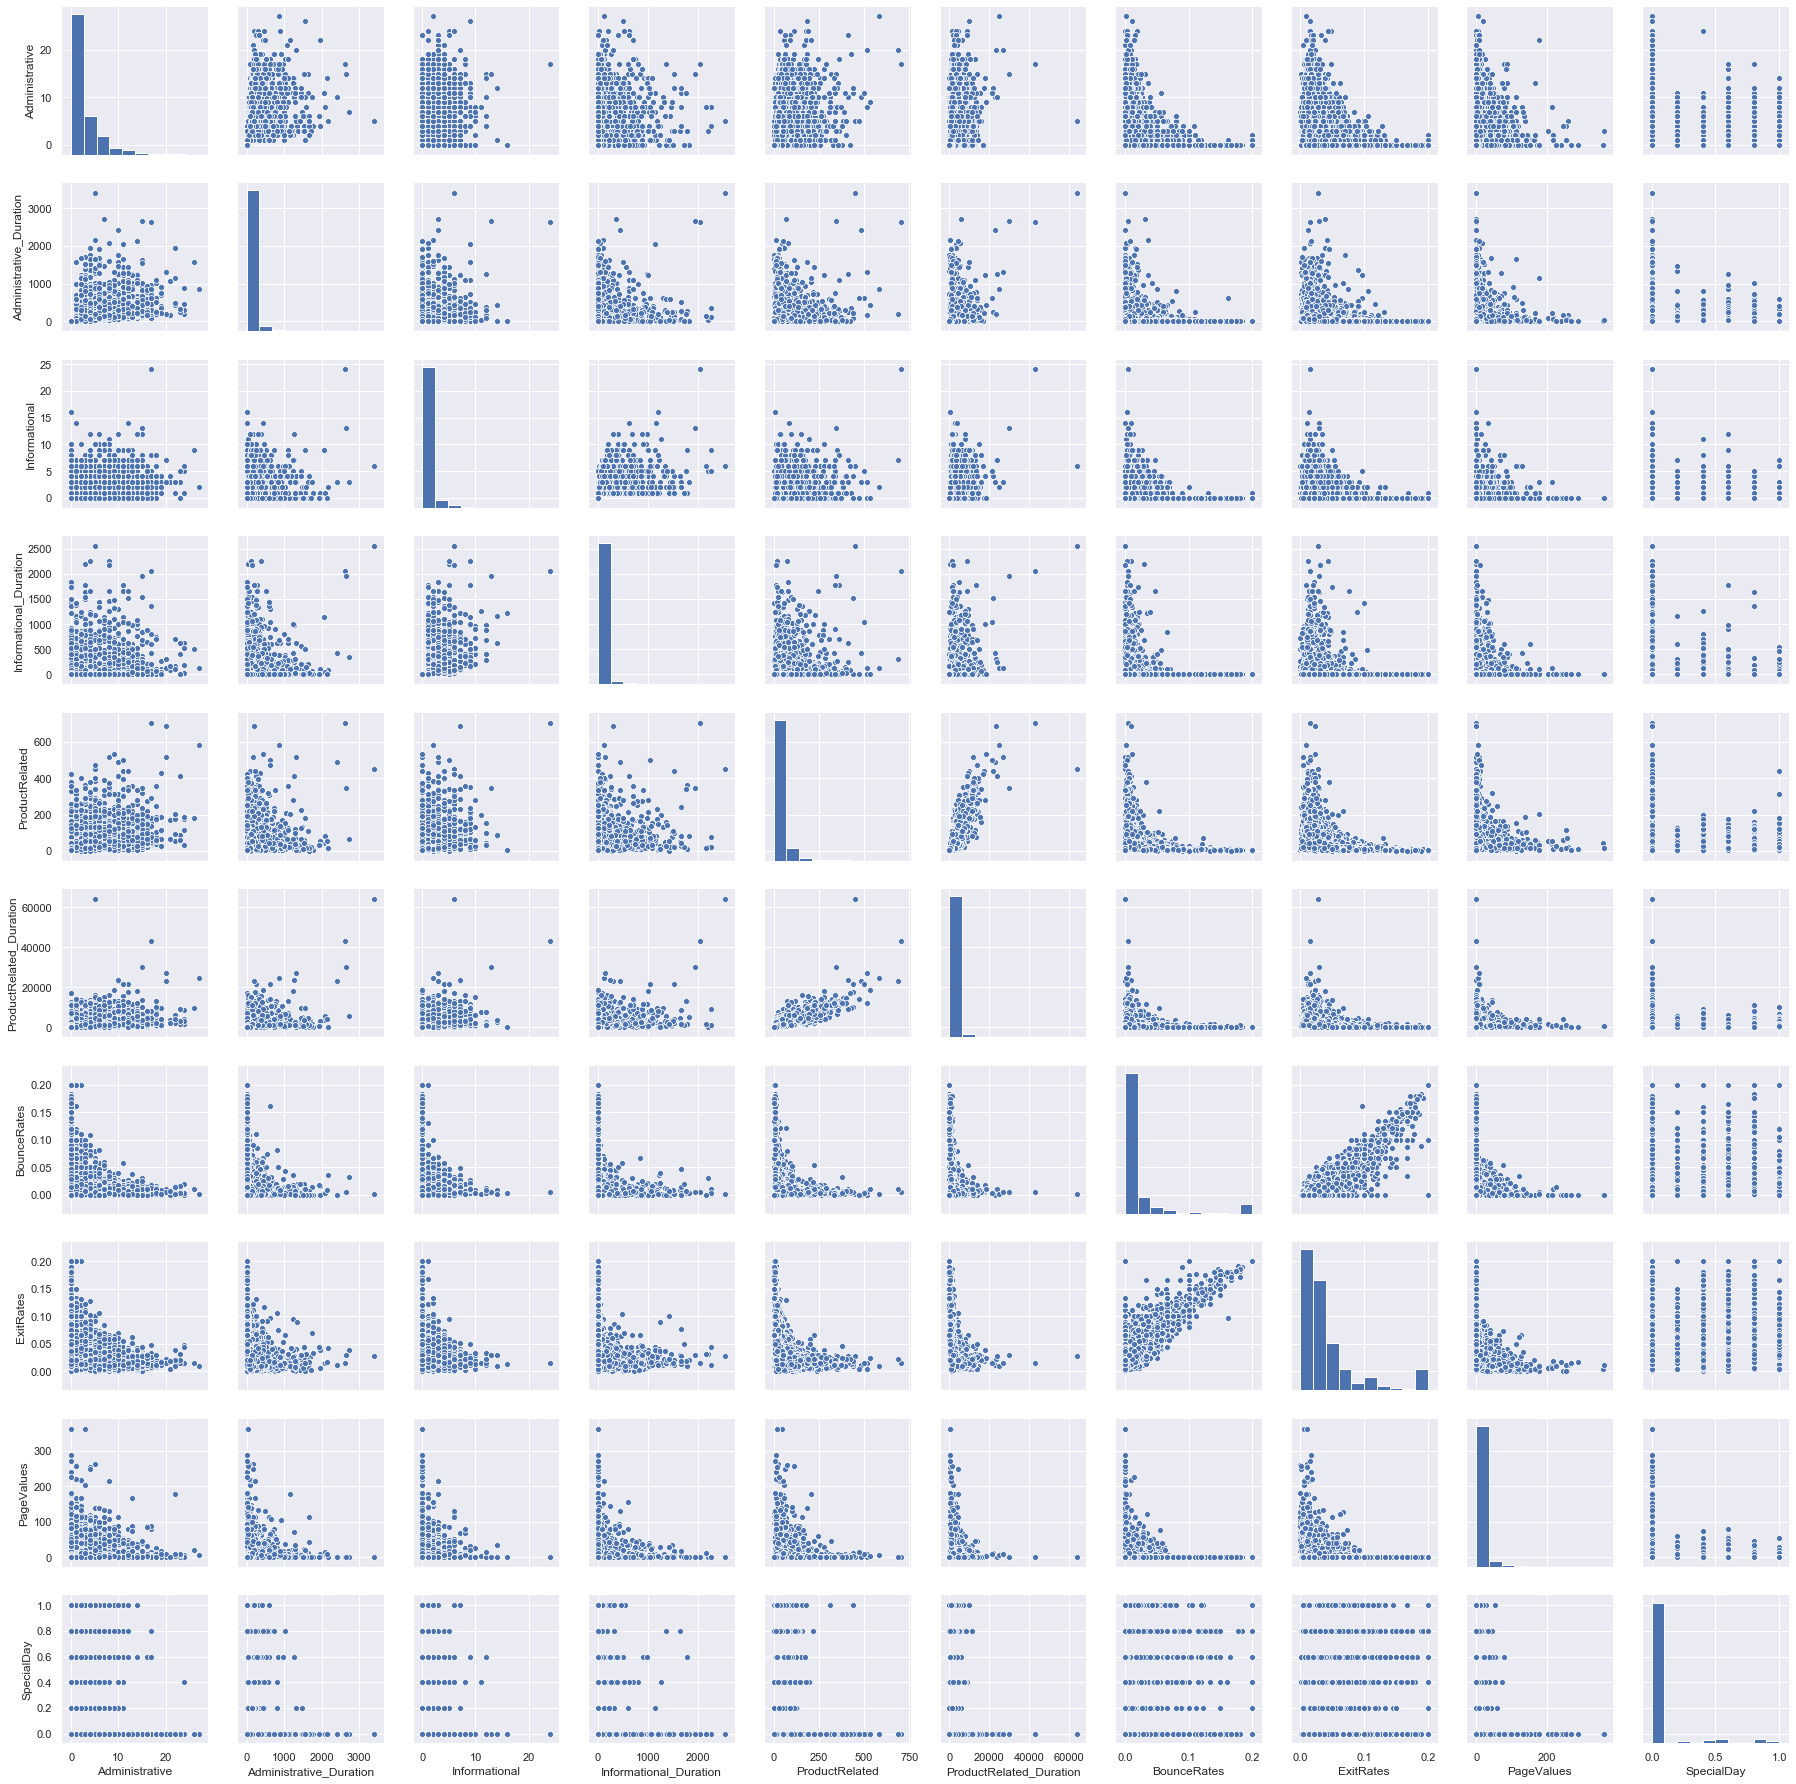

In [16]:

sns.pairplot(data[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']])

<b>The above plot shows the positive, negative and no relationship between all the numeric features. </b>

### i) Univariate Analysis


In [17]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [18]:
data.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                      category
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                category
Weekend                    category
Revenue                    category
dtype: object

In [19]:
# seperating categorical, float and bool
cat = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']
numeric = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


In [20]:
data['Revenue'].unique()

[False, True]
Categories (2, object): [False, True]

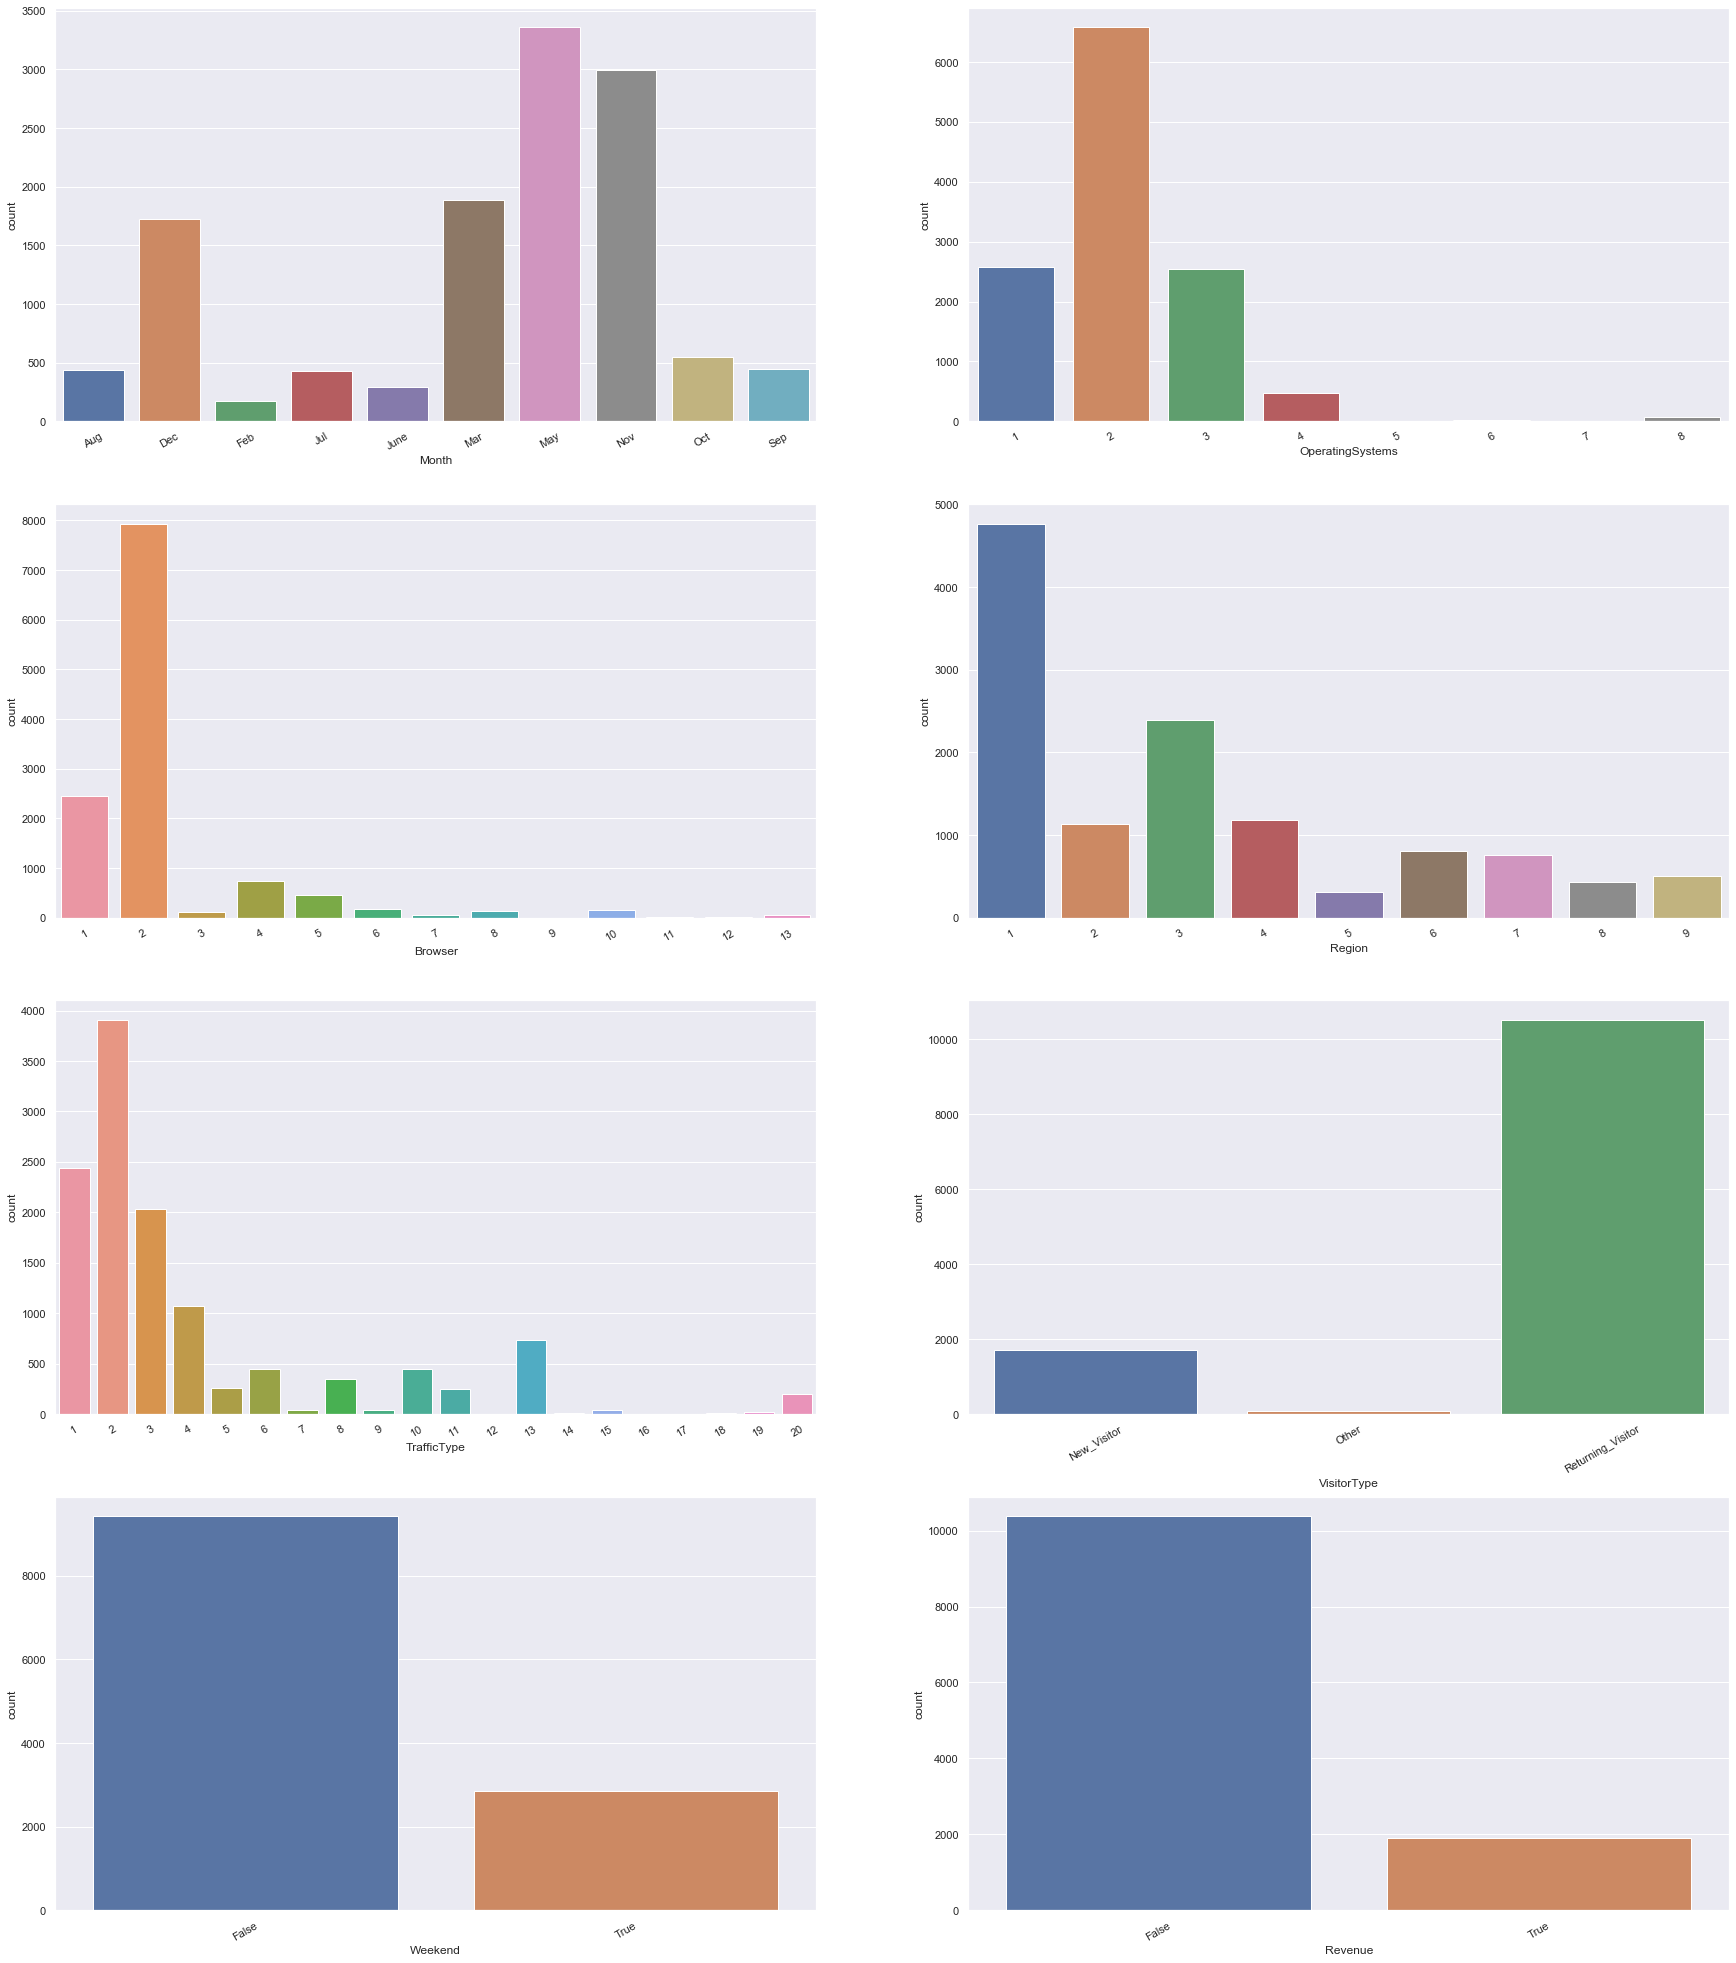

In [21]:
fig = plt.figure(figsize = (30,35))
axes = 420
for category in cat:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = data, x = category)
    plt.xticks(rotation=30)
plt.show()

1) Most of the people visited the online shopping site in May. <br>
2) Shopping site is mostly visited from browser and operating system "2" in dataset.<br>
3) People from region 1 mostly visited and made transactions.<br>
4) Mostly the visitors are returning visitors.<br>
5) During weekdays, people visit the shopping sites mostly.<br>
6) Overall revenue is very low throughout the dataset.<br>

In [22]:
size_vistor = data['VisitorType'].value_counts()
size_OS = data['OperatingSystems'].value_counts()

size_vistor
size_OS

2    6578
1    2573
3    2545
4     476
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

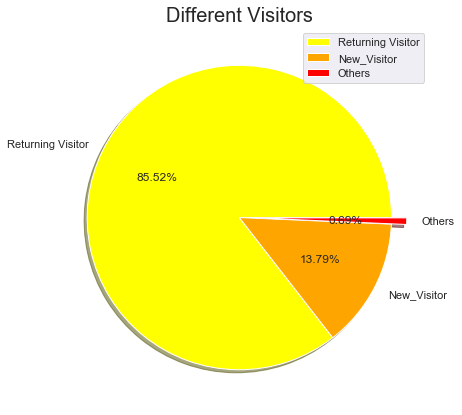

In [23]:

plt.rcParams['figure.figsize'] = (18, 7)
size = size_vistor
colors = ['yellow', 'orange', 'red']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 20)
plt.legend()




<b>Ratio of Returning Visitor is 85.52%, New Visitor is 13.79% and 0.69% others.</b>

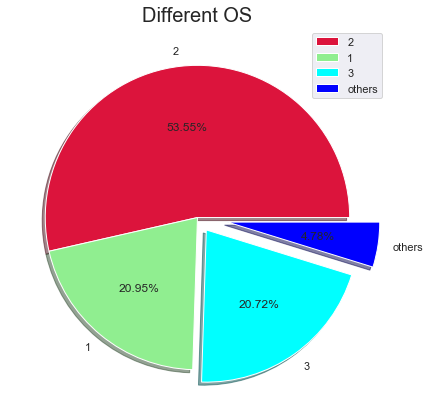

In [24]:
size = [6578,2573,2545,587]
colors = [ 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "3","others"
explode = [0, 0, 0.1,0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different OS', fontsize = 20)
plt.legend()


<b>Ratio of browser 1 is 20.95%, browser 2 is 53.55%, browser 3 is 20.72% and 4.78% others.</b>

In [25]:
size_of_month = data['Month'].value_counts()

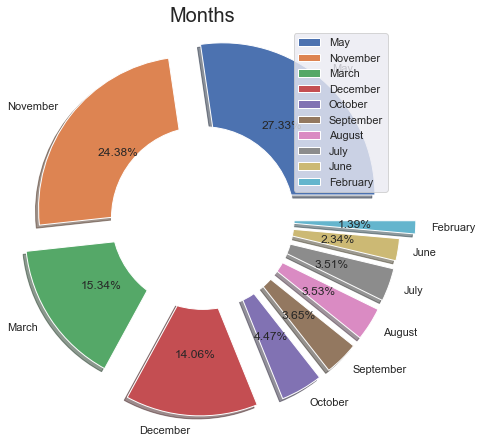

In [26]:

# plotting a pie chart for share of special days

size =size_of_month
colors = sns.color_palette()
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0.2, 0.1, 0.2, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.4]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Months', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()

plt.show()

<b>The above plot shows the distribution of months in the dataset in percentage. Most of the people visited the online shopping site in May, November, March and December.</b>

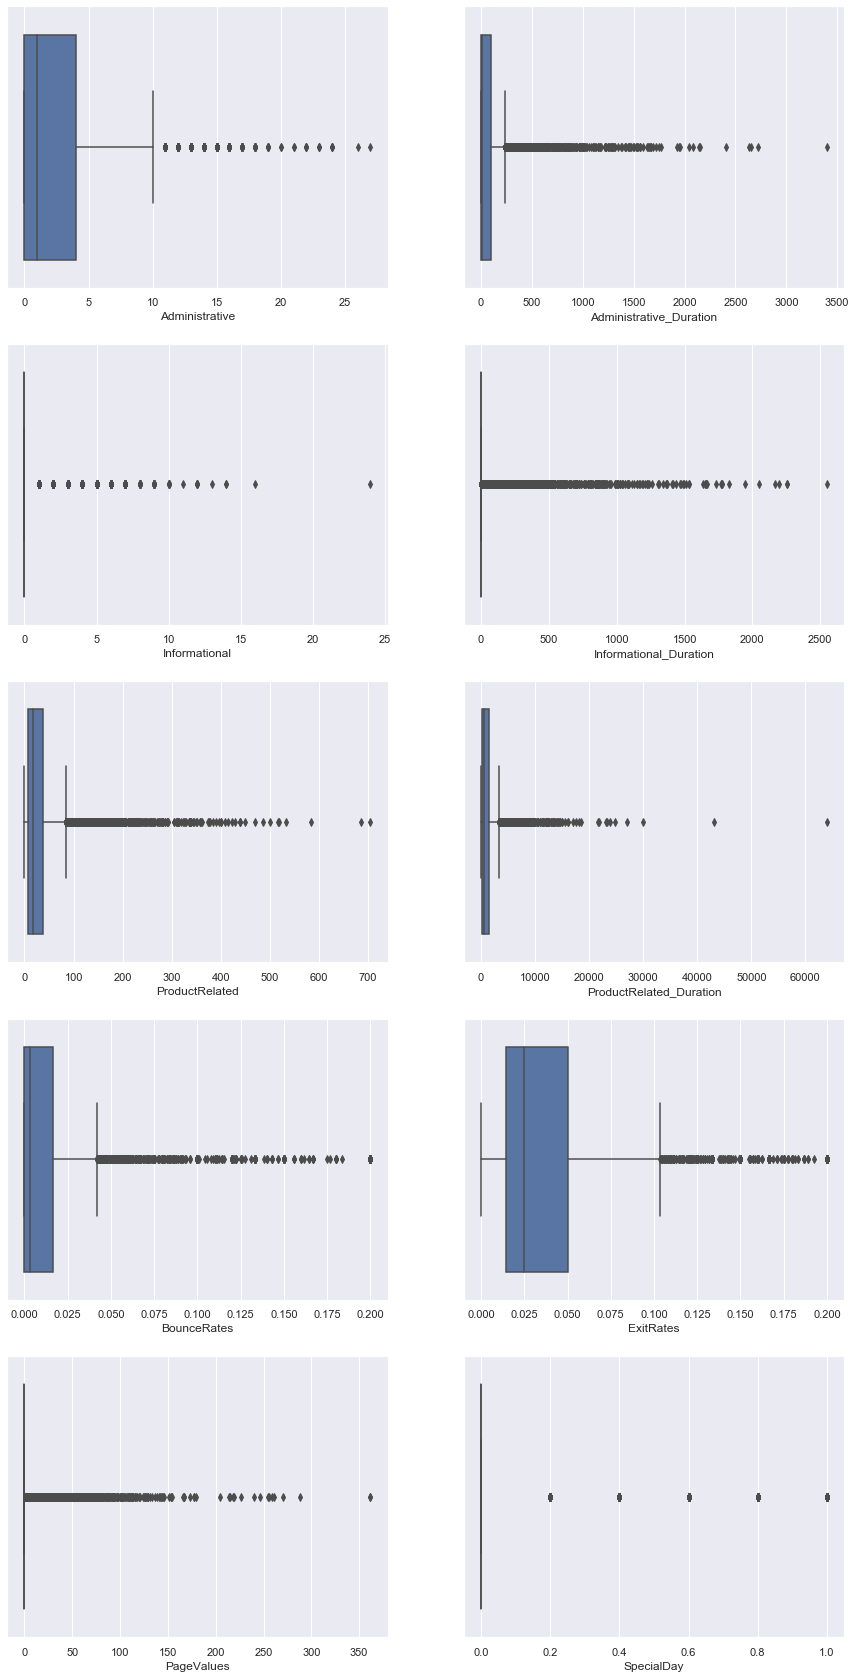

In [27]:
fig = plt.figure(figsize = (15,30))

for i,num in enumerate(numeric):
    
    fig.add_subplot(5,2,i+1)
    sns.boxplot(data = data, x = num)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028891CD64C8>,
      dtype=object)

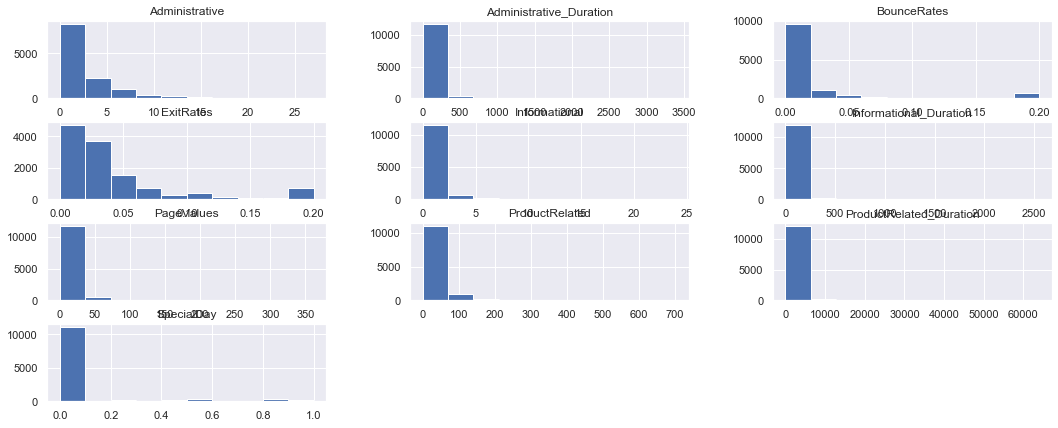

In [28]:

data.hist()

<b>The above result shows there are lots of outliers in numerical data.</b>

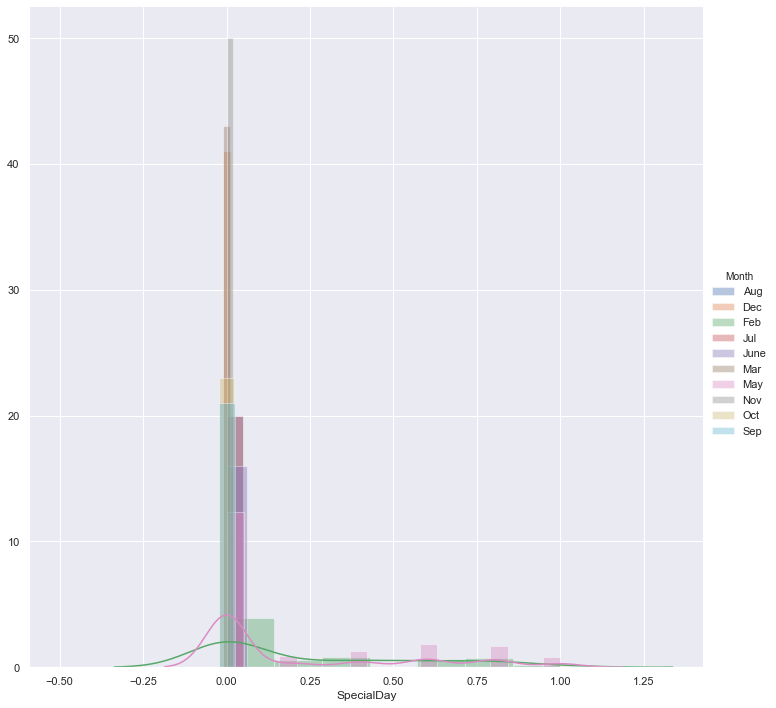

In [29]:
sns.FacetGrid(data,hue='Month',size=10).map(sns.distplot,'SpecialDay').add_legend()

### ii) Bivariate Analysis

#### a) Categorical vs Numerical Plots 


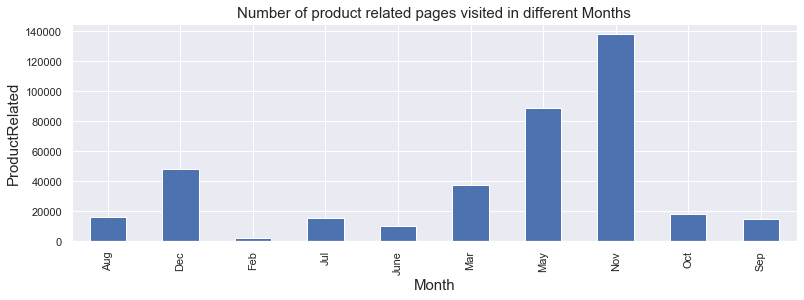

In [30]:
#Plotting how many product related pages visited whole year in different months 
ax = data.groupby('Month')['ProductRelated'].sum().sort_index().plot('bar',figsize=(13,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('ProductRelated',fontsize=15)
ax.set_title('Number of product related pages visited in different Months',fontsize=15)
plt.show()

<b>The above plot shows the sum of product related pages every. In November large number of pages related to products are visited which means people might doing preparations for Christmas, New year, weddings etc.</b> 

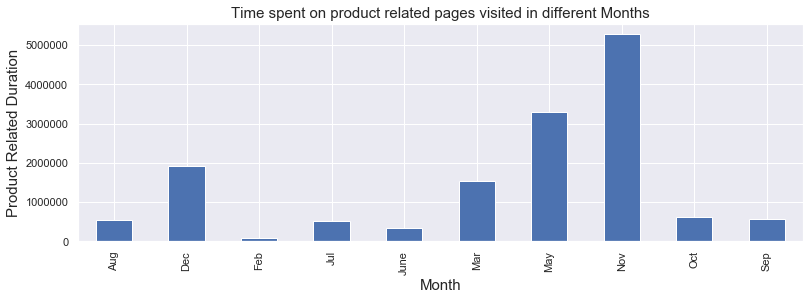

In [31]:
#Plotting how much time spent on product related pages whole year in different months 
ax = data.groupby('Month')['ProductRelated_Duration'].sum().sort_index().plot('bar',figsize=(13,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Product Related Duration',fontsize=15)
ax.set_title('Time spent on product related pages visited in different Months',fontsize=15)
plt.show()

<b>The above plot shows the duration spent on product related pages every month.</b> 

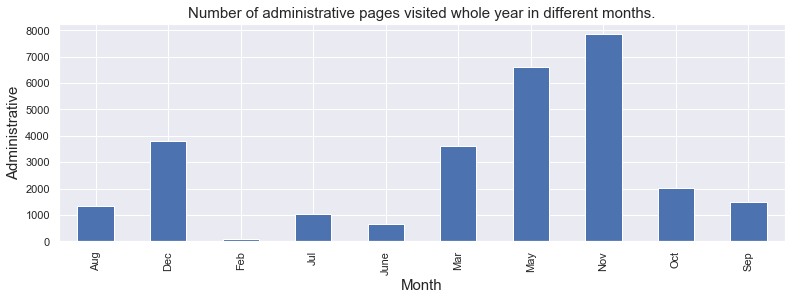

In [32]:
#Plotting how many Administrative pages visited whole year in different months 
ax = data.groupby('Month')['Administrative'].sum().sort_index().plot('bar',figsize=(13,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Administrative',fontsize=15)
ax.set_title('Number of administrative pages visited whole year in different months.',fontsize=15)
plt.show()

<b>The above plot shows total number of times administrative pages visited whole year in different months. </b>

In [33]:
data.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

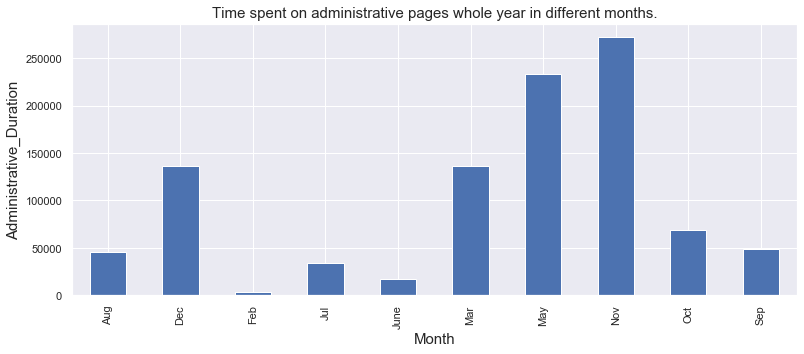

In [34]:
#Plotting how much time spent on administrative pages whole year in different months 
ax = data.groupby('Month')['Administrative_Duration'].sum().sort_index().plot('bar',figsize=(13,5))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Administrative_Duration',fontsize=15)
ax.set_title('Time spent on administrative pages whole year in different months.',fontsize=15)
plt.show()

<b>The above plot shows the duration spent on administrative related pages every month. People might have registered complains regarding delivery, product quantity or quality, delivery men's behavior etc.</b> 

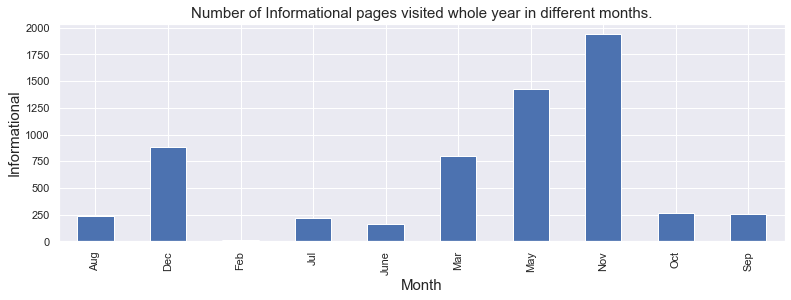

In [35]:
#Plotting how many Informational pages visited whole year in different months 
ax = data.groupby('Month')['Informational'].sum().sort_index().plot('bar',figsize=(13,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Informational',fontsize=15)
ax.set_title('Number of Informational pages visited whole year in different months.',fontsize=15)
plt.show()

<b>The above plot shows total number of times informational pages visited whole year in different months. Customers might asked for the information about products quantity and gave their feedbacks on products and services. </b>

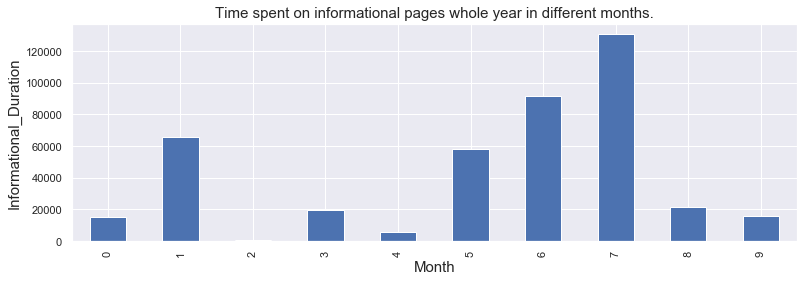

In [128]:
#Plotting how many Informational pages visited whole year in different months 
ax = data.groupby('Month')['Informational_Duration'].sum().sort_index().plot('bar',figsize=(13,4))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Informational Duration',fontsize=15)
ax.set_title('Time spent on informational pages whole year in different months.',fontsize=15)
plt.show()

<b>The above plot shows the duration spent on information related pages every month. People might encounter problems in making transactions or buying products, faqs about delivery and new offers.</b> 

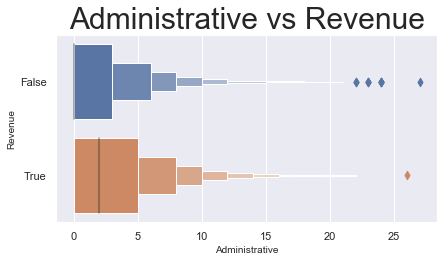

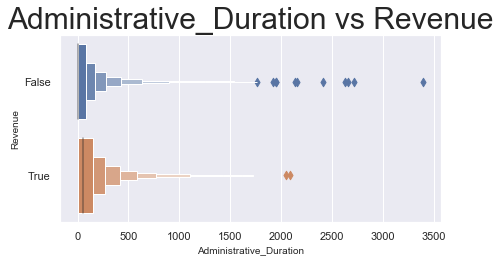

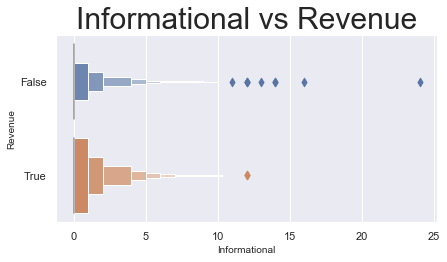

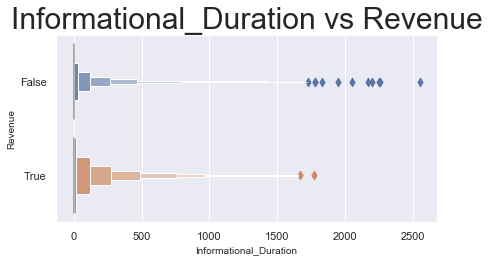

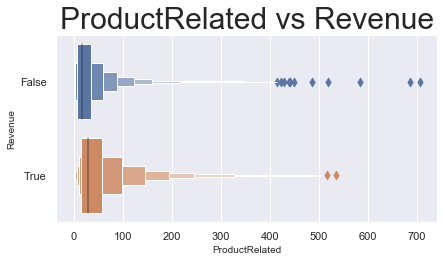

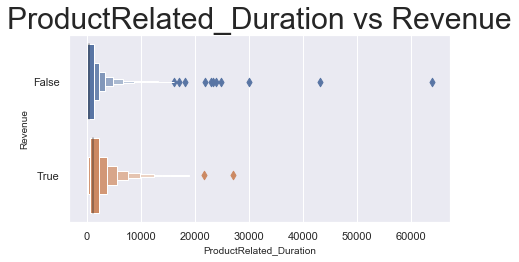

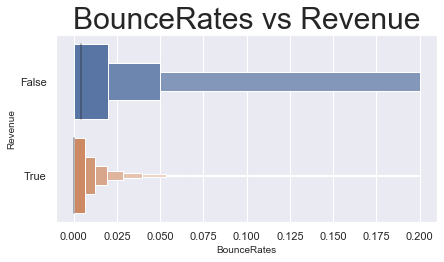

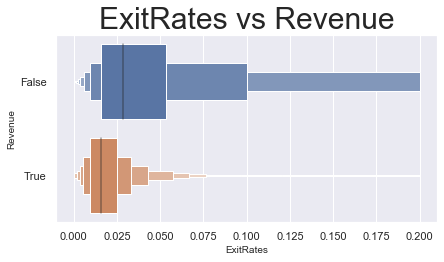

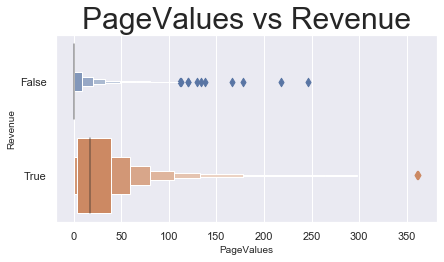

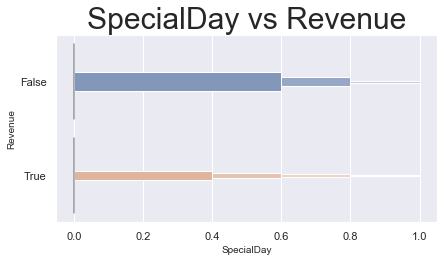

In [37]:

# Numerical vs revenue

plt.rcParams['figure.figsize'] = (15, 20)
i=0
for num in numeric:
    plt.subplot(5, 2, i+1)
    sns.boxenplot(x= num, y='Revenue', data=data, palette = sns.color_palette())
    plt.title(f'{num} vs Revenue', fontsize = 30)
    plt.xlabel(f'{num}', fontsize = 10)
    plt.ylabel('Revenue', fontsize = 10)
    plt.show()
    if i%2 == 0:
        i=0




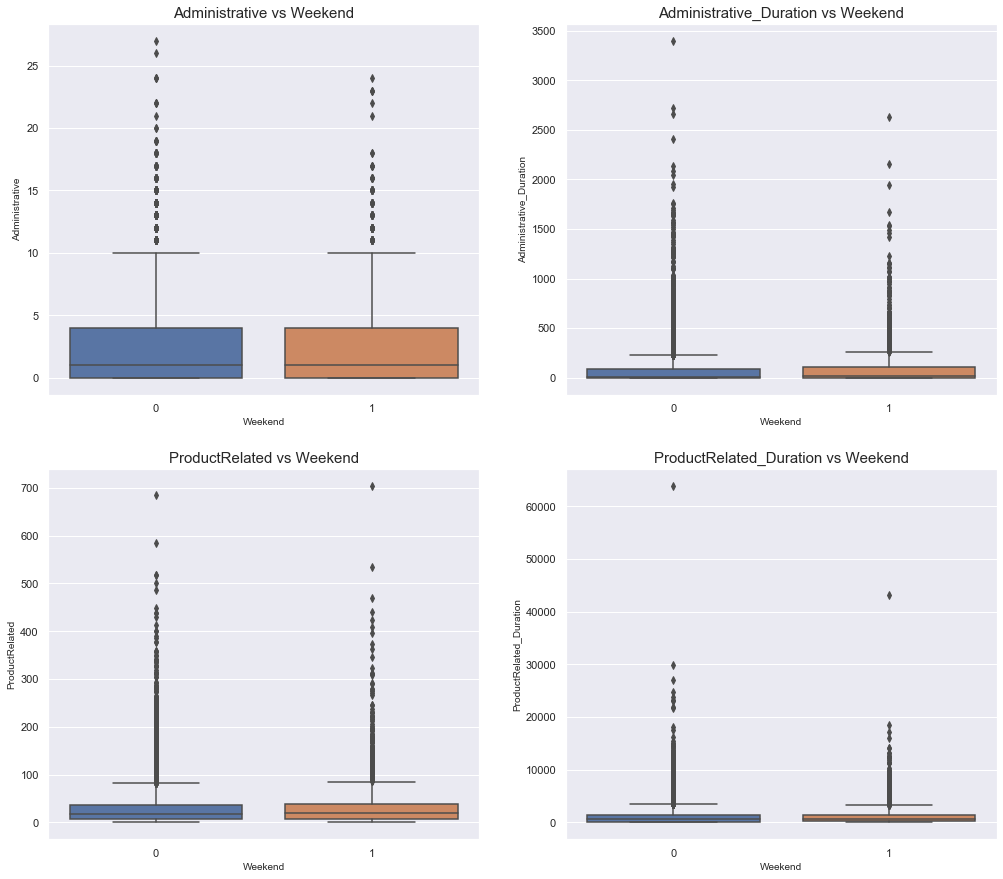

In [130]:
# Numerical features vs Weekend
plt.figure(figsize=(17,15))

plt.subplot(2, 2, 1)
sns.boxplot(x='Weekend', y='Administrative',data=data)
plt.title('Administrative vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('Administrative', fontsize = 10)

plt.subplot(2, 2, 2)
sns.boxplot(x='Weekend', y='Administrative_Duration',data=data)
plt.title('Administrative_Duration vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('Administrative_Duration', fontsize = 10)


plt.subplot(2, 2, 3)
sns.boxplot(x='Weekend', y='ProductRelated',data=data)
plt.title('ProductRelated vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('ProductRelated', fontsize = 10)

plt.subplot(2, 2, 4)
sns.boxplot(x='Weekend', y='ProductRelated_Duration',data=data)
plt.title('ProductRelated_Duration vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('ProductRelated_Duration', fontsize = 10)

plt.show()

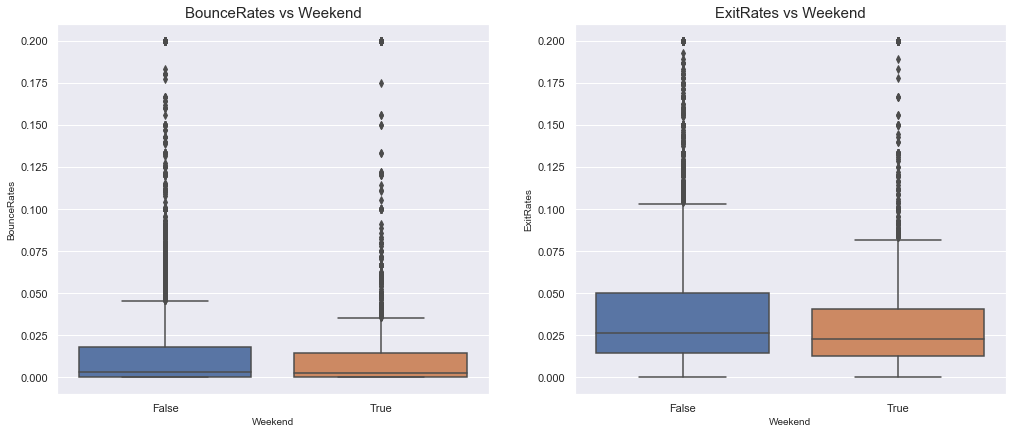

In [39]:
# Numerical features vs Weekend

plt.figure(figsize=(17,15))

plt.subplot(2, 2, 1)
sns.boxplot(x='Weekend', y='BounceRates',data=data)
plt.title('BounceRates vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('BounceRates', fontsize = 10)

plt.subplot(2, 2, 2)
sns.boxplot(x='Weekend', y='ExitRates',data=data)
plt.title('ExitRates vs Weekend', fontsize = 15)
plt.xlabel('Weekend', fontsize = 10)
plt.ylabel('ExitRates', fontsize = 10)


plt.show()



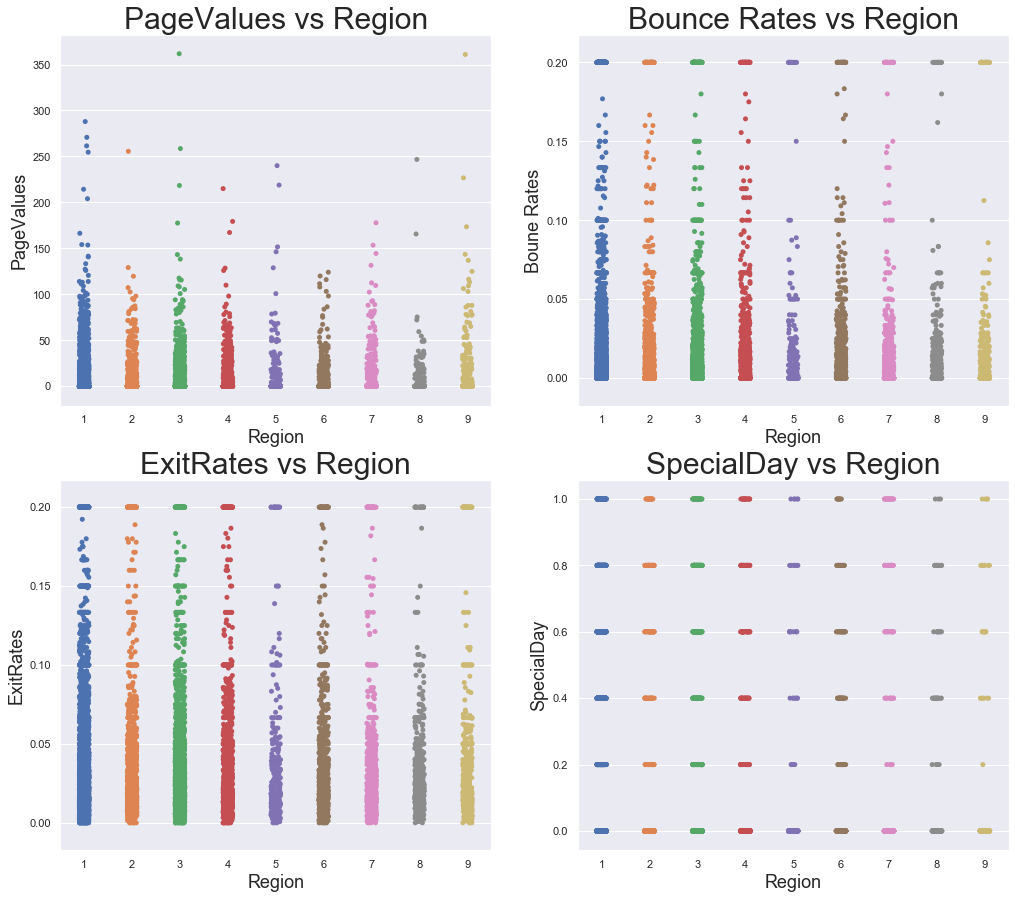

In [40]:

plt.figure(figsize=(17,15))
# PageValues vs Region
plt.subplot(2, 2, 1)
sns.stripplot(data['Region'], data['PageValues'])
plt.title('PageValues vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('PageValues', fontsize = 18)

# bounce rates vs Region
plt.subplot(2, 2, 2)
sns.stripplot(data['Region'], data['BounceRates'])
plt.title('Bounce Rates vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('Boune Rates', fontsize = 18)

# ExitRates vs Region
plt.subplot(2, 2, 3)
sns.stripplot(data['Region'], data['ExitRates'])
plt.title('ExitRates vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('ExitRates', fontsize = 18)

# SpecialDay vs Region
plt.subplot(2, 2, 4)
sns.stripplot(data['Region'], data['SpecialDay'])
plt.title('SpecialDay vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('SpecialDay', fontsize = 18)

plt.show()

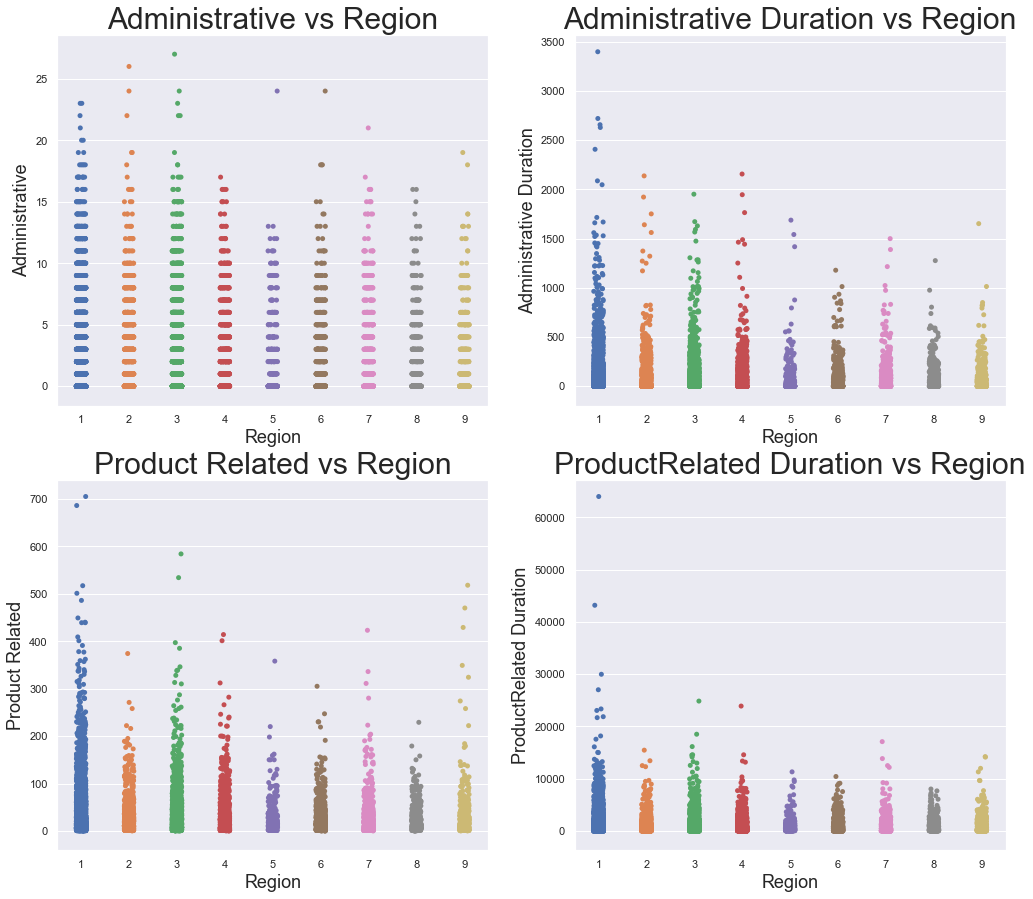

In [41]:
plt.figure(figsize=(17,15))

# Administrative vs Region
plt.subplot(2, 2, 1)
sns.stripplot(data['Region'], data['Administrative'])
plt.title('Administrative vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('Administrative', fontsize = 18)

# Administrative Duration vs Region
plt.subplot(2, 2, 2)
sns.stripplot(data['Region'], data['Administrative_Duration'])
plt.title('Administrative Duration vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('Administrative Duration', fontsize = 18)

# ProductRelated vs Region
plt.subplot(2, 2, 3)
sns.stripplot(data['Region'], data['ProductRelated'])
plt.title('Product Related vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('Product Related', fontsize = 18)

# Product Related Duration vs Region
plt.subplot(2, 2, 4)
sns.stripplot(data['Region'], data['ProductRelated_Duration'])
plt.title('ProductRelated Duration vs Region', fontsize = 30)
plt.xlabel('Region', fontsize = 18)
plt.ylabel('ProductRelated Duration', fontsize = 18)

plt.show()

#### b) Numerical vs Numerical Plots 

In [42]:
cat 

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [43]:
numeric

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay']

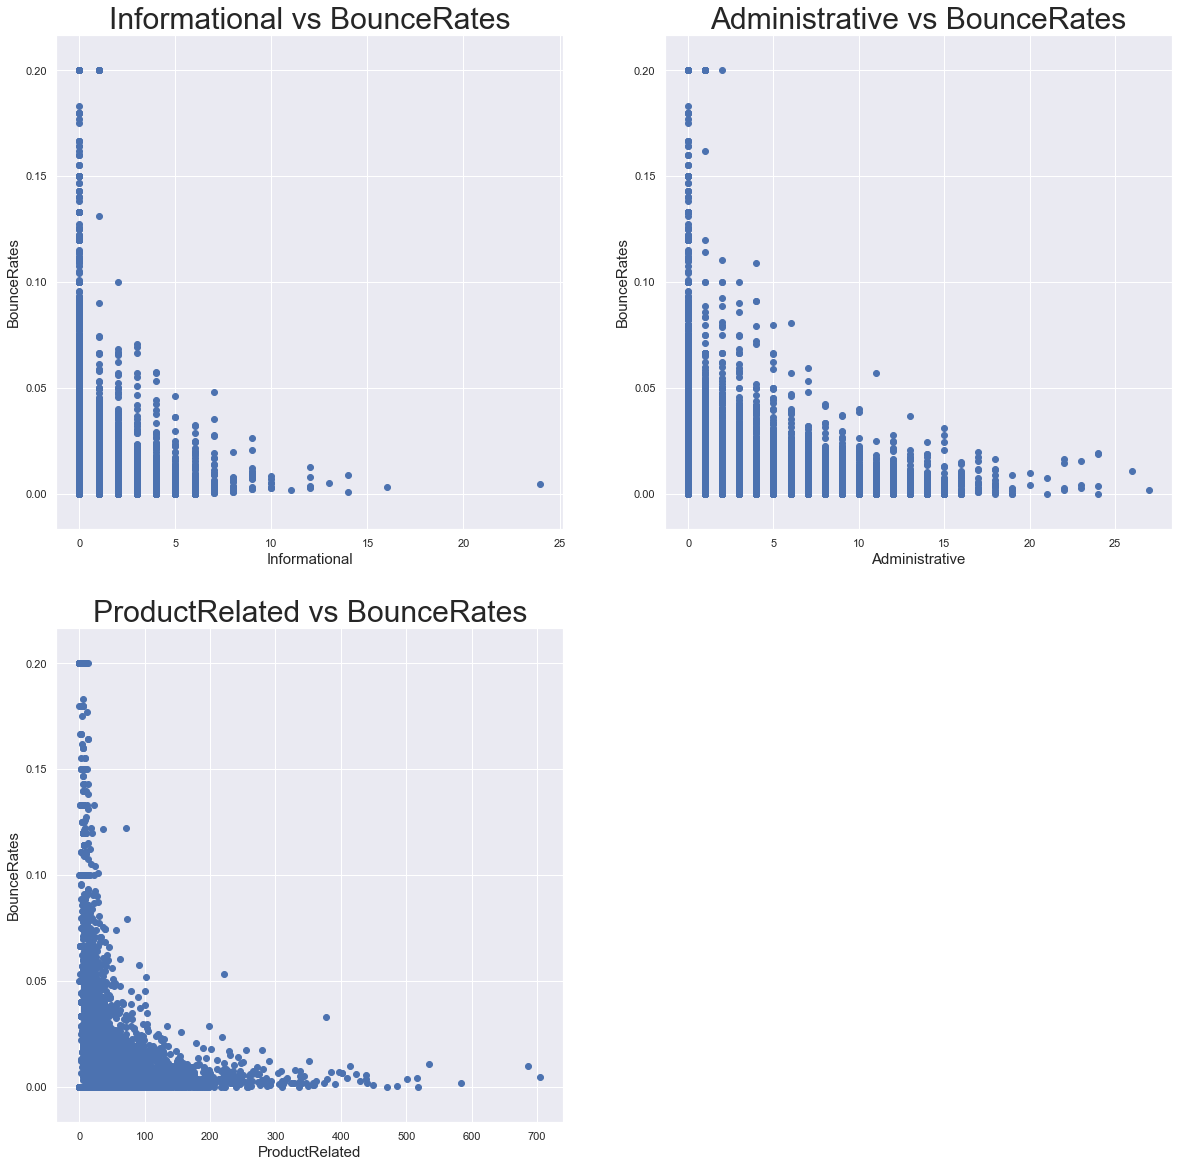

In [44]:

plt.figure(figsize=(20,20))

# Informational vs BounceRates
plt.subplot(2, 2, 1)
plt.scatter(data['Informational'], data['BounceRates'])
plt.title('Informational vs BounceRates', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)

# Administrative vs BounceRates 
plt.subplot(2, 2, 2)
plt.scatter(data['Administrative'], data['BounceRates'])
plt.title('Administrative vs BounceRates', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)

# ProductRelated vs BounceRates
plt.subplot(2, 2, 3)
plt.scatter(data['ProductRelated'], data['BounceRates'])
plt.title('ProductRelated vs BounceRates', fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)


plt.show()

<b>There is negative relationship of all types of pages with bounce rate.</b>
<pre>1) As the number of informational pages visited increases, the percentage of bounce rate decreases.
2) As the number of Administrative pages visited increases, the percentage of bounce rate decreases.
3) As the number of product related pages visited increases, the percentage of bounce rate decreases.</pre>

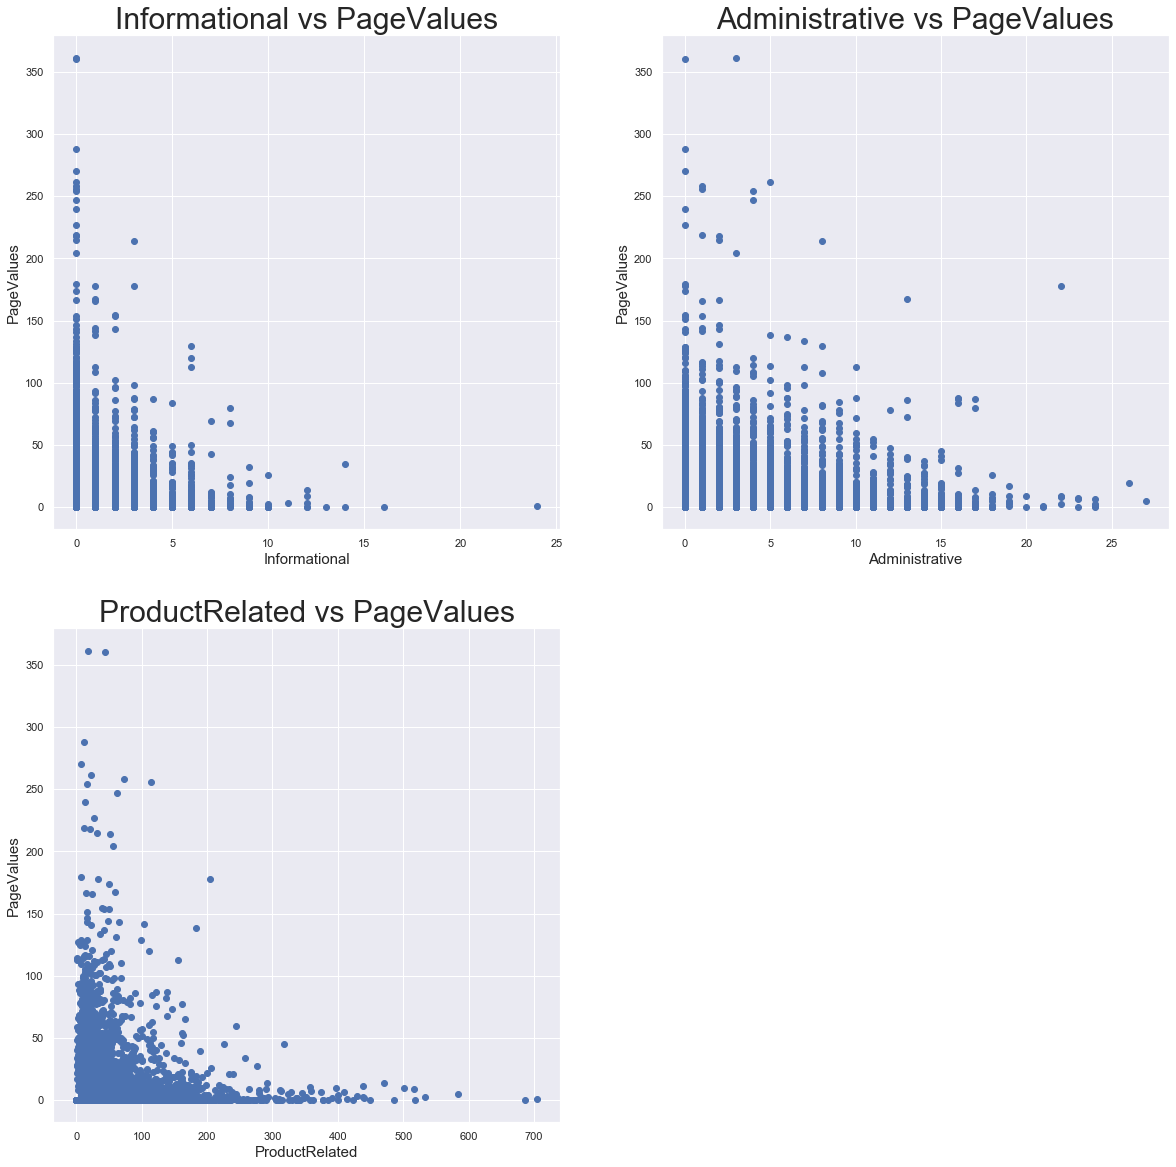

In [45]:

plt.figure(figsize=(20,20))

# Informational vs PageValues
plt.subplot(2, 2, 1)
plt.scatter(data['Informational'], data['PageValues'] )
plt.title('Informational vs PageValues', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('PageValues', fontsize = 15)

# Administrative vs PageValues 
plt.subplot(2, 2, 2)
plt.scatter(data['Administrative'], data['PageValues'] )
plt.title('Administrative vs PageValues', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('PageValues', fontsize = 15)

# ProductRelated vs PageValues
plt.subplot(2, 2, 3)
plt.scatter(data['ProductRelated'], data['PageValues'] )
plt.title('ProductRelated vs PageValues', fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('PageValues', fontsize = 15)


plt.show()

<b>The above graph shows that there is negative relationship of all types of pages with bounce rate.</b>

#### b) Categorical vs Categorical Plots 

<Figure size 360x288 with 0 Axes>

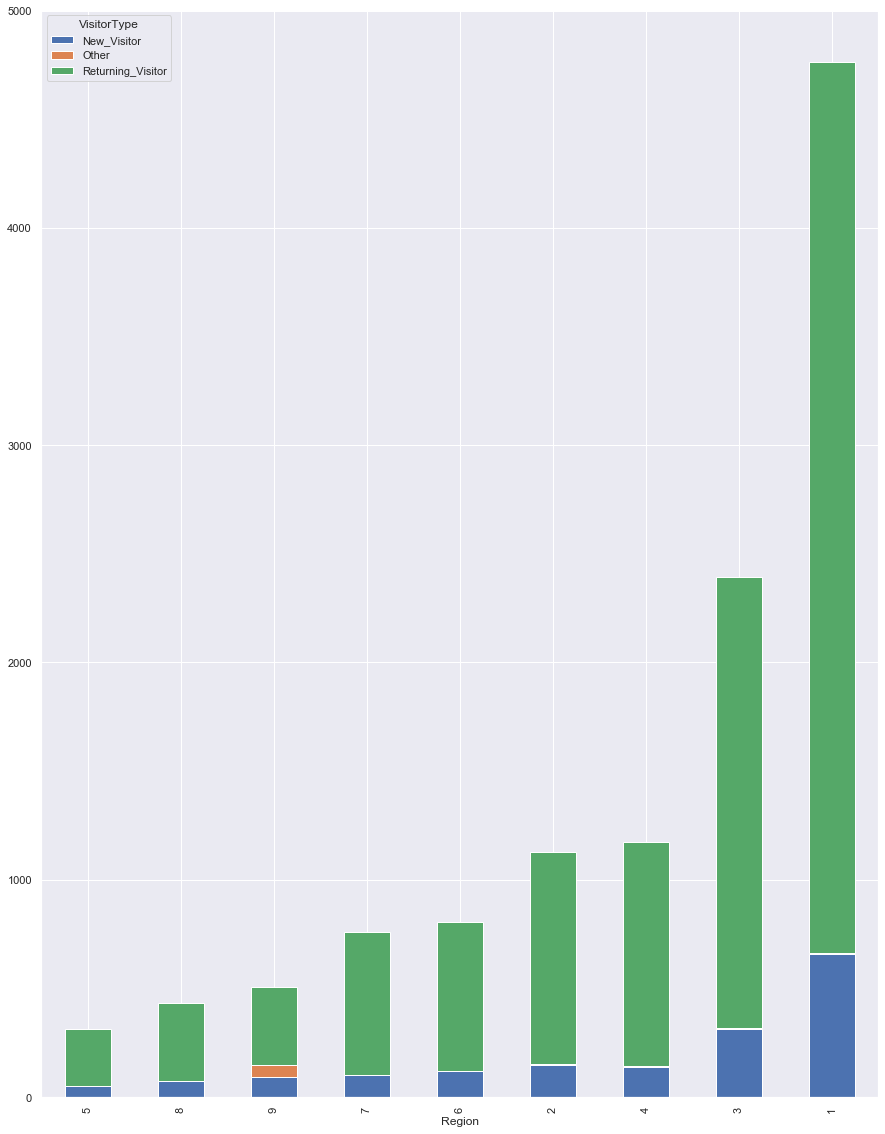

In [46]:
plt.figure(figsize=(5,4))
ct = pd.crosstab(data['Region'],data["VisitorType"]).sort_values(by="Returning_Visitor")
ct.plot(kind ='bar',stacked=True)

<b>The above result shows how number of different types of visitors vary region wise.</b>
<pre>1) Region 5,6 and 8 have lowest number of returning and new visitor which means online shopping is not so common in that region
2) Region 7,9,2 and 4 have more returning visitors and less number of new visitors.
3) Region 3 and 1 have the highest numbers of new and returning visitors.</pre>

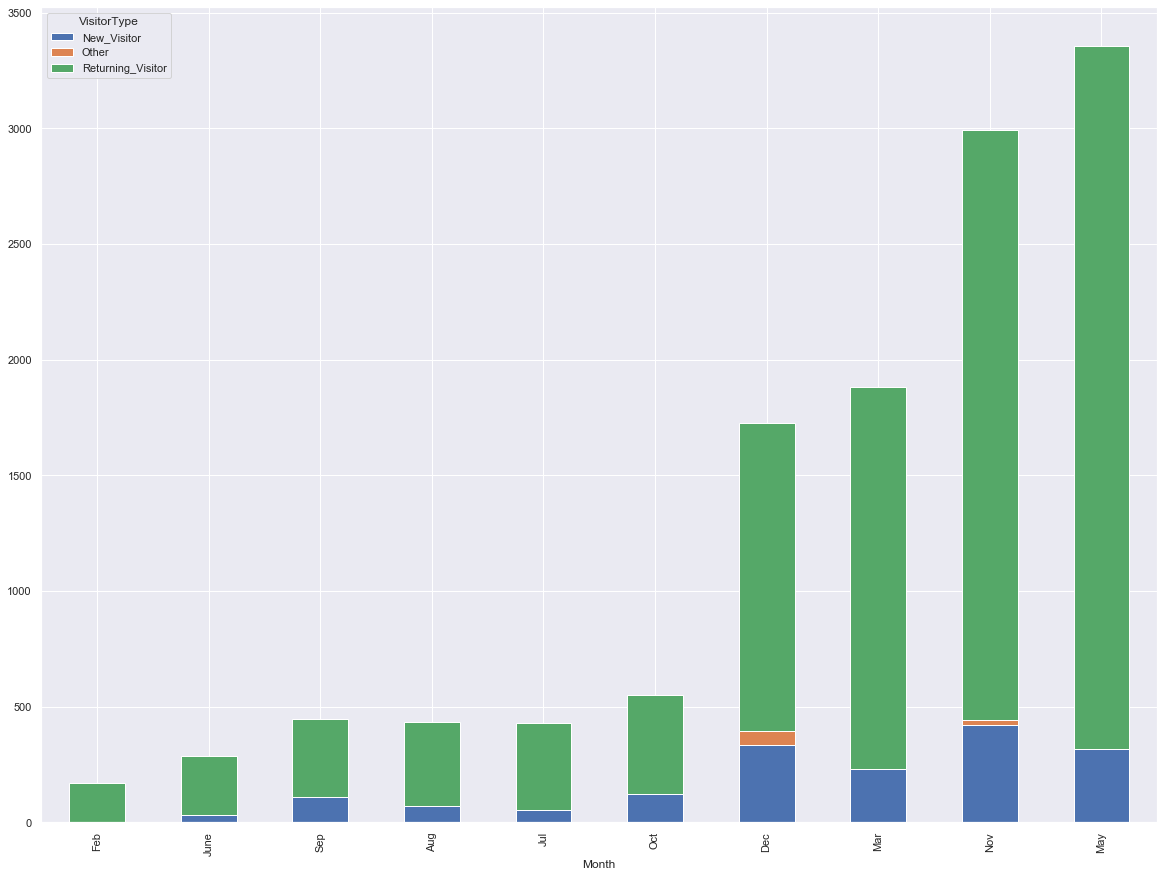

In [47]:

ct = pd.crosstab(data['Month'],data["VisitorType"]).sort_values(by="Returning_Visitor")
ct.plot(kind ='bar',figsize=(20,15),stacked=True)

<b>The above result shows how number of different types of visitors vary month wise.</b>

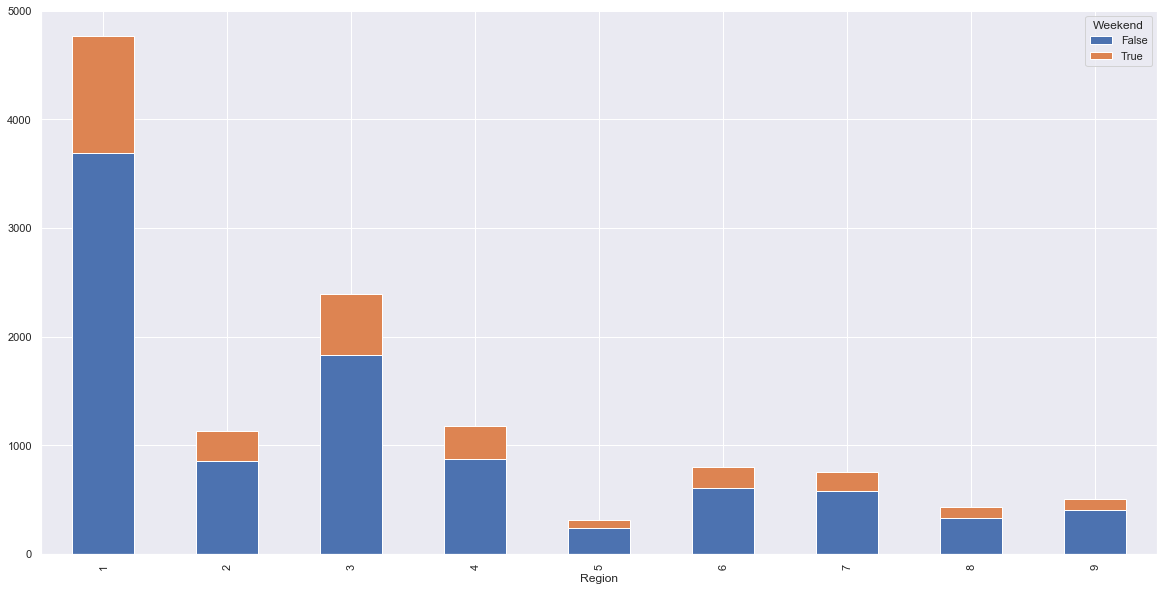

In [48]:
ct = pd.crosstab(data['Region'],data["Weekend"])
ct.plot(kind ='bar',figsize=(20,10),stacked=True)

<b>The above result shows how many sessions recorded at weekends or weekdays in different regions.</b>

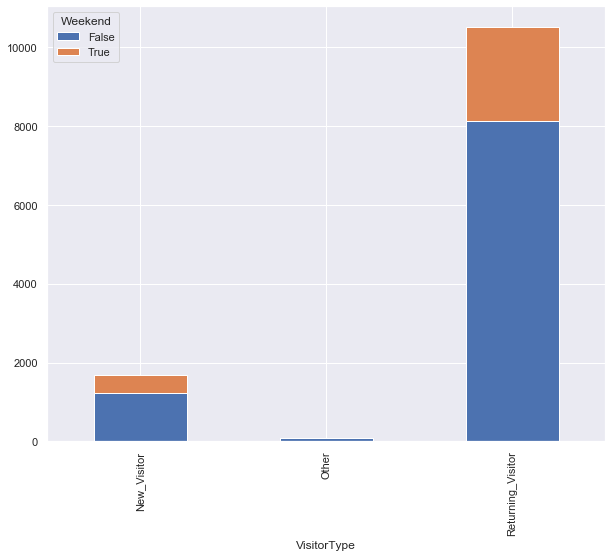

In [49]:
ct = pd.crosstab(data['VisitorType'],data["Weekend"])
ct.plot(kind ='bar',figsize=(10,8),stacked=True)

<b>The above result shows how many sessions of different types of visitors recorded at weekends or weekdays.</b>

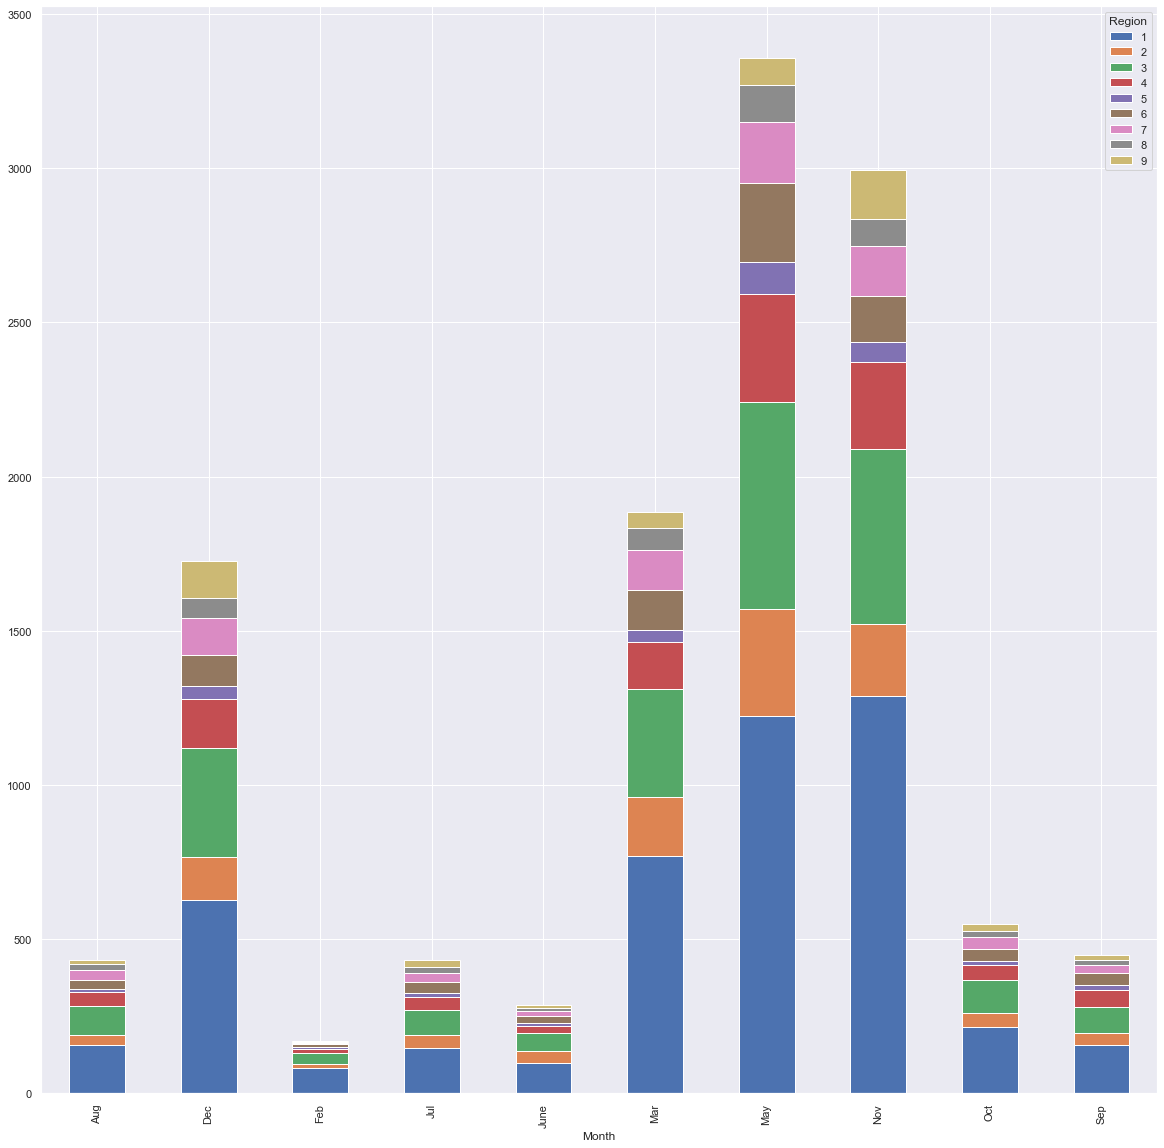

In [50]:
ct = pd.crosstab(data['Month'],data["Region"])
ct.plot(kind ='bar',figsize=(20,20),stacked=True)

<b>The above result shows how many sessions from different regions recorded in different months.</b>

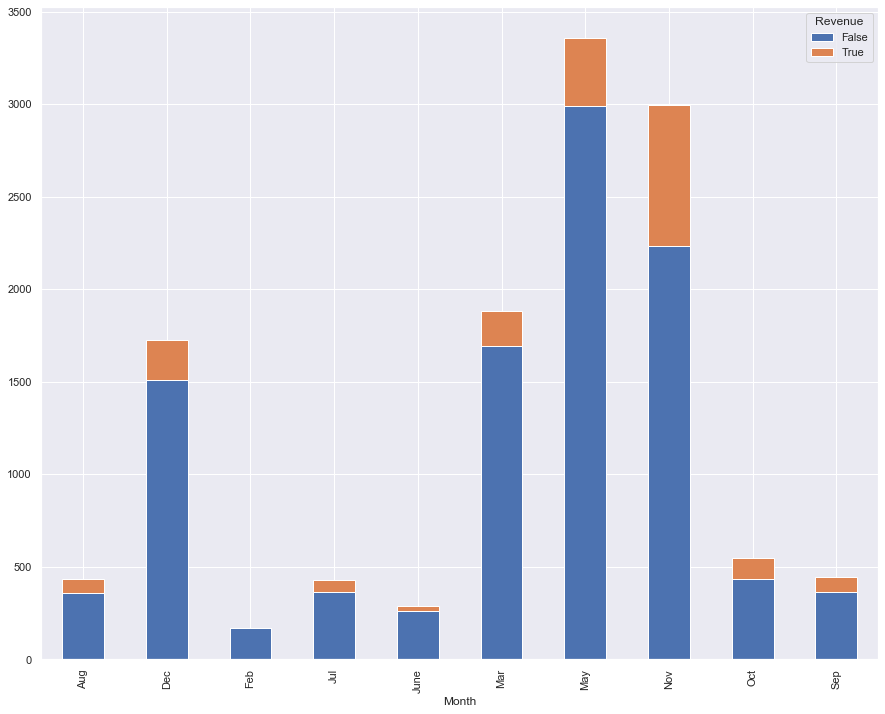

In [51]:
ct = pd.crosstab(data['Month'],data["Revenue"])
ct.plot(kind ='bar',figsize=(15,12),stacked=True)

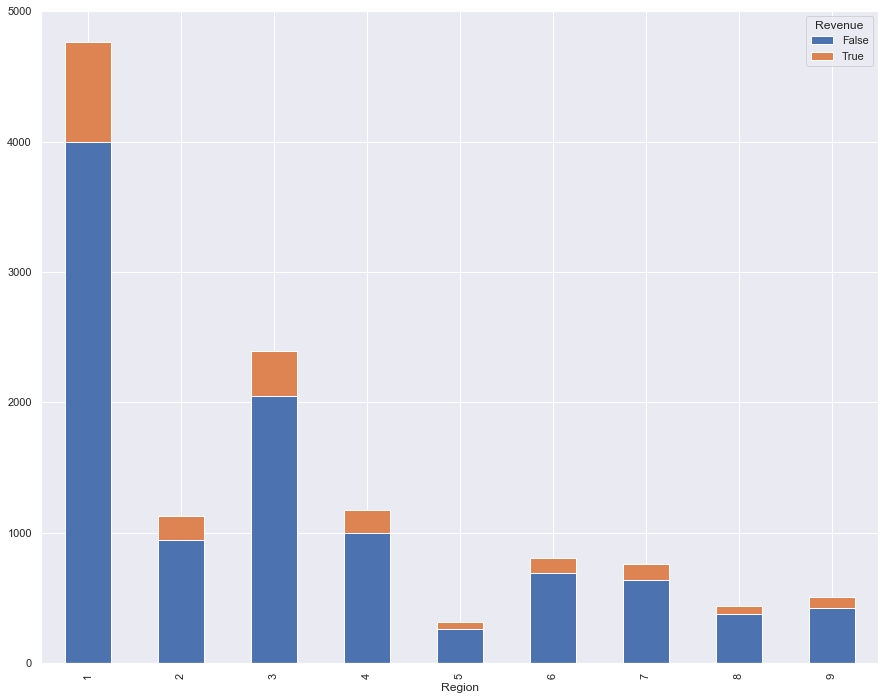

In [52]:
ct = pd.crosstab(data['Region'],data["Revenue"])
ct.plot(kind ='bar',figsize=(15,12),stacked=True)

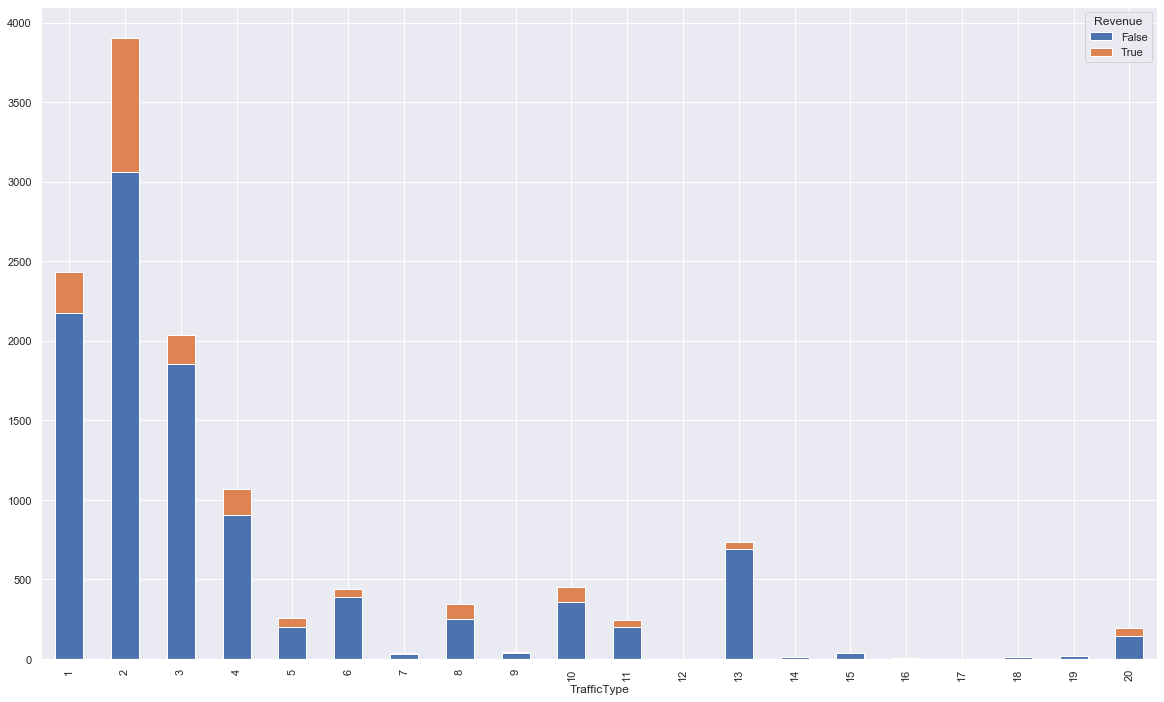

In [53]:
ct = pd.crosstab(data['TrafficType'],data["Revenue"])
ct.plot(kind ='bar',figsize=(20,12),stacked=True)

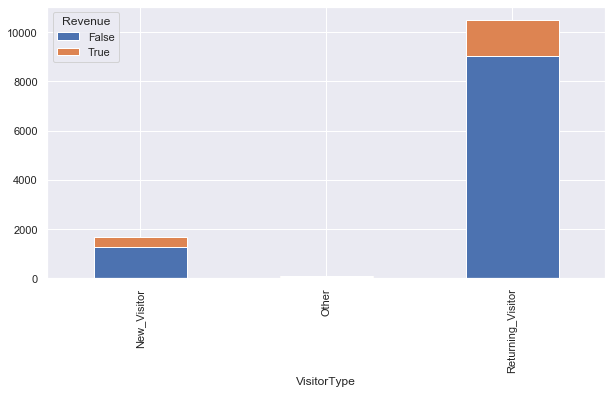

In [54]:
ct = pd.crosstab(data['VisitorType'],data["Revenue"])
ct.plot(kind ='bar',figsize=(10,5),stacked=True)

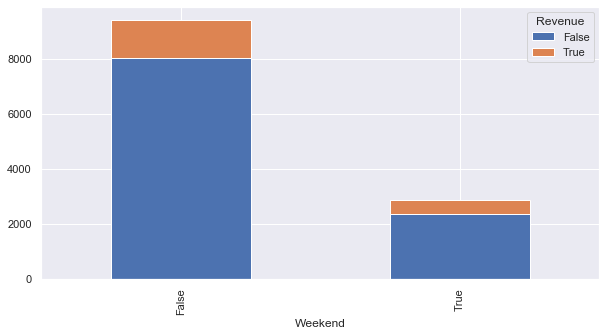

In [55]:
ct = pd.crosstab(data['Weekend'],data["Revenue"])
ct.plot(kind ='bar',figsize=(10,5),stacked=True)

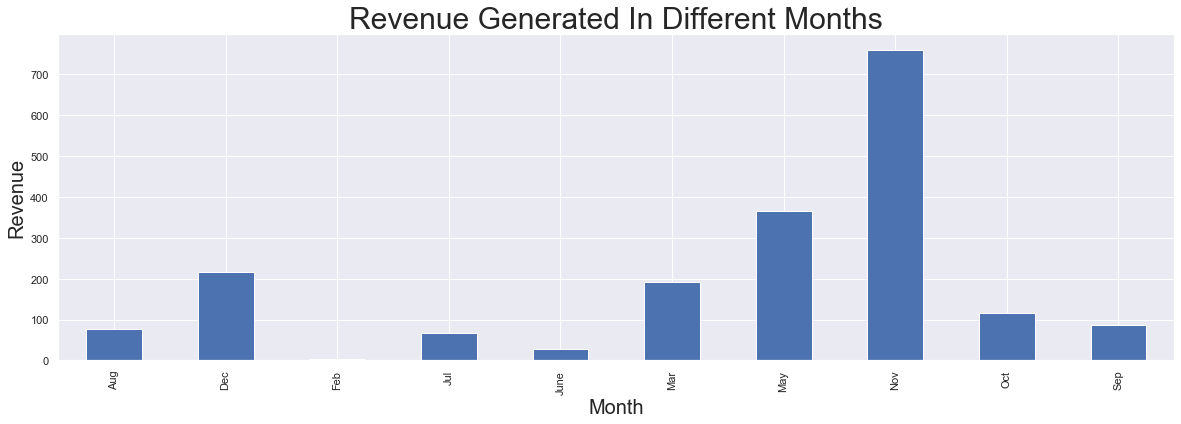

In [56]:
# Showing revenue how much revenue generated in different months out of total revenue generated by different session.

ax=data[data["Revenue"]==True].groupby("Month")["Revenue"].count().plot('bar',figsize=(20,6))
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Revenue',fontsize=20)
ax.set_title('Revenue Generated In Different Months',fontsize=30)
plt.show()

<b>Showing revenue how much revenue generated in different months out of total revenue generated by different session.</b>

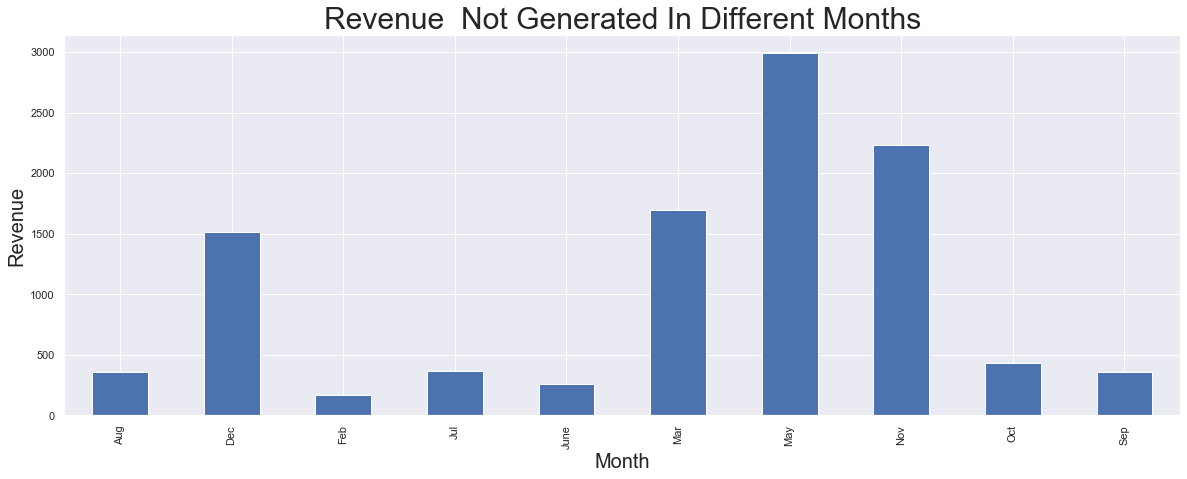

In [57]:
# Showing revenue how much revenue not generated in different months out of total revenue generated by different session.

ax=data[data["Revenue"]==False].groupby("Month")["Revenue"].count().plot('bar',figsize=(20,7))
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Revenue',fontsize=20)
ax.set_title('Revenue  Not Generated In Different Months',fontsize=30)
plt.show()

<b>Showing revenue how much revenue not generated in different months out of total revenue generated by different session.</b>

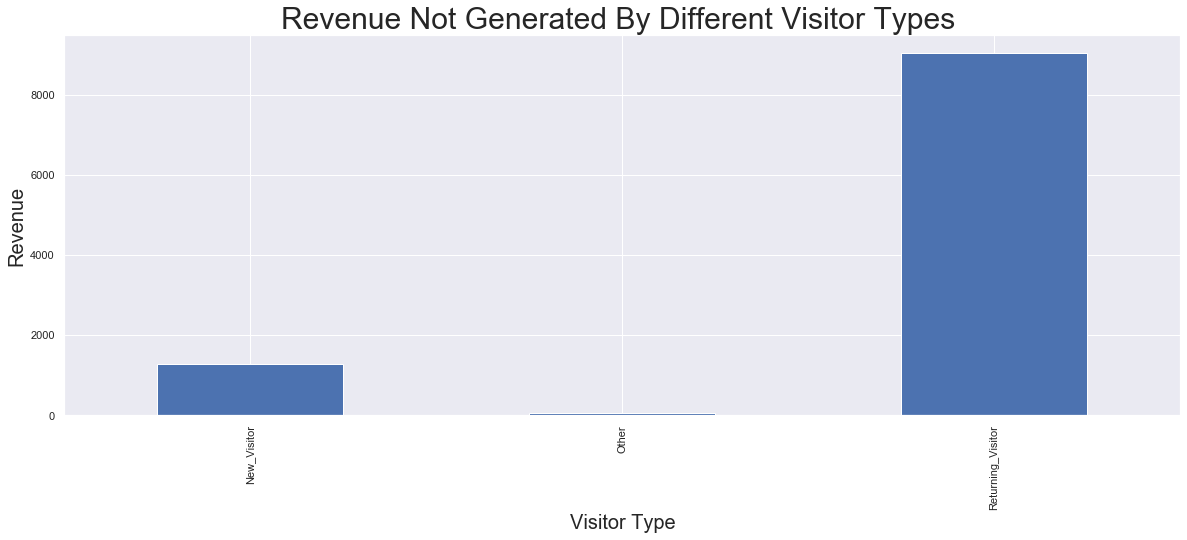

In [58]:
ax=data[data["Revenue"]==False].groupby("VisitorType")["Revenue"].count().plot('bar',figsize=(20,7))
ax.set_xlabel('Visitor Type',fontsize=20)
ax.set_ylabel('Revenue',fontsize=20)
ax.set_title('Revenue Not Generated By Different Visitor Types ',fontsize=30)
plt.show()

<b>Showing revenue how much revenue not generated by different visitor types out of total revenue not generated by different sessions.</b>

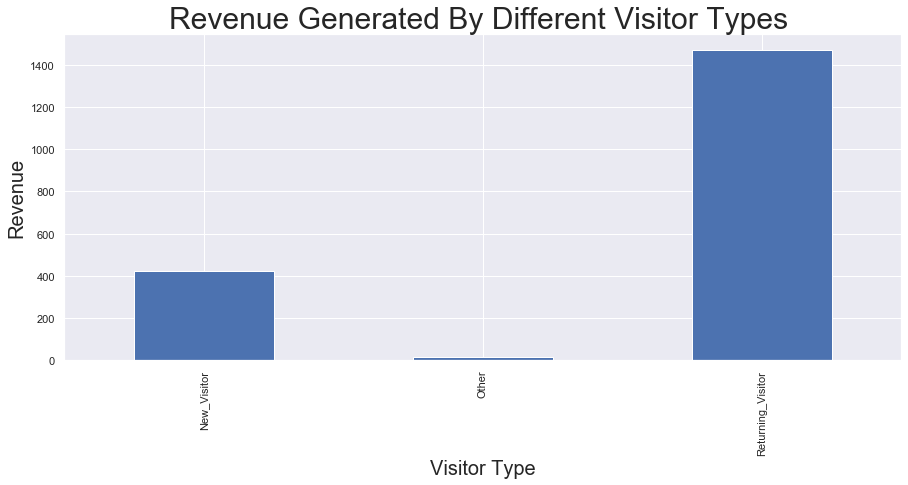

In [59]:
ax=data[data["Revenue"]==True].groupby("VisitorType")["Revenue"].count().sort_values(ascending=False).sort_index().plot('bar',figsize=(15,6))
ax.set_xlabel('Visitor Type',fontsize=20)
ax.set_ylabel('Revenue',fontsize=20)
ax.set_title('Revenue Generated By Different Visitor Types ',fontsize=30)
plt.show()

<b>Showing revenue how much revenue generated by different visitor types out of total revenue not generated by different sessions.</b>

### 4. Feature Engineering and Preprocessing

In [60]:
# change the categorical type from string to integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Revenue"] = le.fit_transform(data["Revenue"])
data["VisitorType"] = le.fit_transform(data["VisitorType"])
data["Month"] = le.fit_transform(data["Month"])
data["Weekend"] = le.fit_transform(data["Weekend"])

In [61]:
data.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   
5             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   
5                     0.0            19.0               154.216667   

   BounceRates  ExitRates  PageValues  SpecialDay  Month OperatingSystems  \
0     0.200000   0.200000         0.0         0.0      2                1   
1     0.000000   0.100000         0.0         0.0      2                2   
3     0.050000   0.140000         0.0         0.0      2                3   
4     0.020000   0.050000         0.0         0.0      2                3   
5     0.015789   0.024561         0.0         0.0      2                2   

  Browser Region TrafficType  VisitorType  Weekend  Revenue  
0       1      1           1            2        0        0  
1       2      1           2            2        0        0  
3       2      2           4            2        0        0  
4       3      1           4            2        1        0  
5       2      1           3            2        0        0

In [62]:
# changing data types
data["OperatingSystems"]=data["OperatingSystems"].astype('category')
data["Browser"]=data["Browser"].astype('category')
data["Region"]=data["Region"].astype('category')
data["TrafficType"]=data["TrafficType"].astype('category')
data["VisitorType"]=data["VisitorType"].astype('category')
data["Month"]=data["Month"].astype('category')
data["Weekend"]=data["Weekend"].astype('category')
data["Revenue"]=data["Revenue"].astype('category')

In [63]:
data.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601171   
Administrative_Duration        0.601171                 1.000000   
Informational                  0.376374                 0.302304   
Informational_Duration         0.255479                 0.237734   
ProductRelated                 0.430116                 0.288277   
ProductRelated_Duration        0.372935                 0.354749   
BounceRates                   -0.221188                -0.142435   
ExitRates                     -0.314919                -0.204583   
PageValues                     0.098267                 0.067096   
SpecialDay                    -0.095300                -0.073636   

                         Informational  Informational_Duration  \
Administrative                0.376374                0.255479   
Administrative_Duration       0.302304                0.237734   
Informational                 1.000000                0.618880   
Informational_Duration        0.618880                1.000000   
ProductRelated                0.373680                0.279701   
ProductRelated_Duration       0.387065                0.347088   
BounceRates                  -0.114485               -0.073064   
ExitRates                    -0.162471               -0.104530   
PageValues                    0.048217                0.030579   
SpecialDay                   -0.048448               -0.030731   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.430116                 0.372935    -0.221188   
Administrative_Duration        0.288277                 0.354749    -0.142435   
Informational                  0.373680                 0.387065    -0.114485   
Informational_Duration         0.279701                 0.347088    -0.073064   
ProductRelated                 1.000000                 0.860711    -0.201828   
ProductRelated_Duration        0.860711                 1.000000    -0.181990   
BounceRates                   -0.201828                -0.181990     1.000000   
ExitRates                     -0.290579                -0.249958     0.911252   
PageValues                     0.055521                 0.052124    -0.118532   
SpecialDay                    -0.024348                -0.036757     0.074726   

                         ExitRates  PageValues  SpecialDay  
Administrative           -0.314919    0.098267   -0.095300  
Administrative_Duration  -0.204583    0.067096   -0.073636  
Informational            -0.162471    0.048217   -0.048448  
Informational_Duration   -0.104530    0.030579   -0.030731  
ProductRelated           -0.290579    0.055521   -0.024348  
ProductRelated_Duration  -0.249958    0.052124   -0.036757  
BounceRates               0.911252   -0.118532    0.074726  
ExitRates                 1.000000   -0.174110    0.104718  
PageValues               -0.174110    1.000000   -0.063777  
SpecialDay                0.104718   -0.063777    1.000000

<b>The above result shows the strongest positive relationship between product related and productRelated_duration and exit rates and bounce rates.</b>

In [64]:
#Random Forest method for feature selctiion
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    
#thit is how we get the feature importance with simple steps:
# Load classification dataset
y = data['Revenue'].copy()
X = data.drop('Revenue',axis=1)

model.fit(X, y)

# display the relative importance of each attribute
importances = np.around(model.feature_importances_,decimals=4)
print(importances)

#0.0250 is a  selected threshold looking at the importance values this can be changed to any other value too
cols_randfor_removed=[index for index,value in enumerate(importances) if value <= 0.0250] 
print(cols_randfor_removed)

X_randfor_sel = X.drop(X.columns[cols_randfor_removed],axis=1)
features_randfor_select=X_randfor_sel.columns
print(features_randfor_select)


[0.0382 0.0622 0.0163 0.0255 0.0752 0.0904 0.0513 0.0898 0.3785 0.0029
 0.0438 0.0177 0.022  0.0323 0.0297 0.0132 0.011 ]
[2, 9, 11, 12, 15, 16]
Index(['Administrative', 'Administrative_Duration', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'Month', 'Region', 'TrafficType'],
      dtype='object')


In [65]:
Df_for_cluster = pd.DataFrame()
for sel in features_randfor_select:
    Df_for_cluster[sel] = data[sel]

In [66]:
Df_for_cluster.head()

Administrative  Administrative_Duration  Informational_Duration  \
0             0.0                      0.0                     0.0   
1             0.0                      0.0                     0.0   
3             0.0                      0.0                     0.0   
4             0.0                      0.0                     0.0   
5             0.0                      0.0                     0.0   

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0             1.0                 0.000000     0.200000   0.200000   
1             2.0                64.000000     0.000000   0.100000   
3             2.0                 2.666667     0.050000   0.140000   
4            10.0               627.500000     0.020000   0.050000   
5            19.0               154.216667     0.015789   0.024561   

   PageValues Month Region TrafficType  
0         0.0     2      1           1  
1         0.0     2      1           2  
3         0.0     2      2           4  
4         0.0     2      1           4  
5         0.0     2      1           3

#### Analyzing for outliers in numerial features

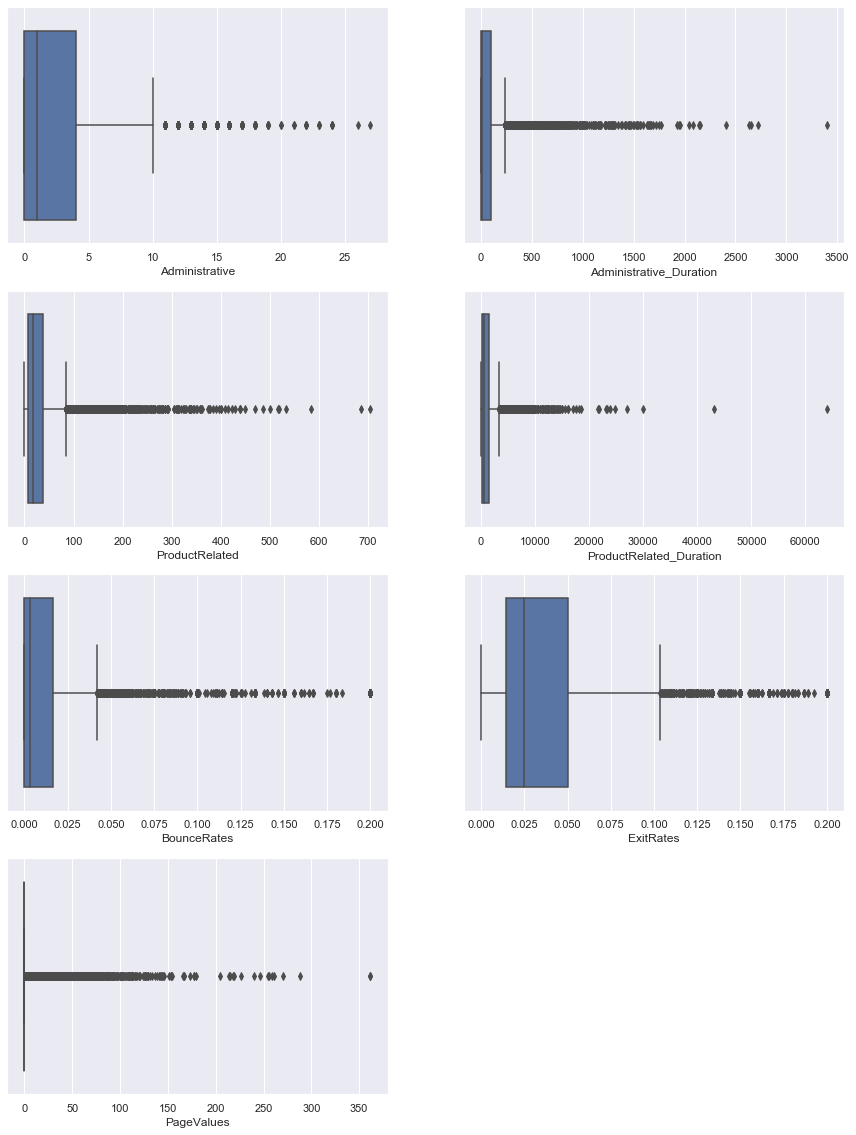

In [67]:
numeric = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']

fig = plt.figure(figsize = (15,20))
axes = 420
for num in numeric:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = Df_for_cluster, x = num)
plt.show()

No handles with labels found to put in legend.


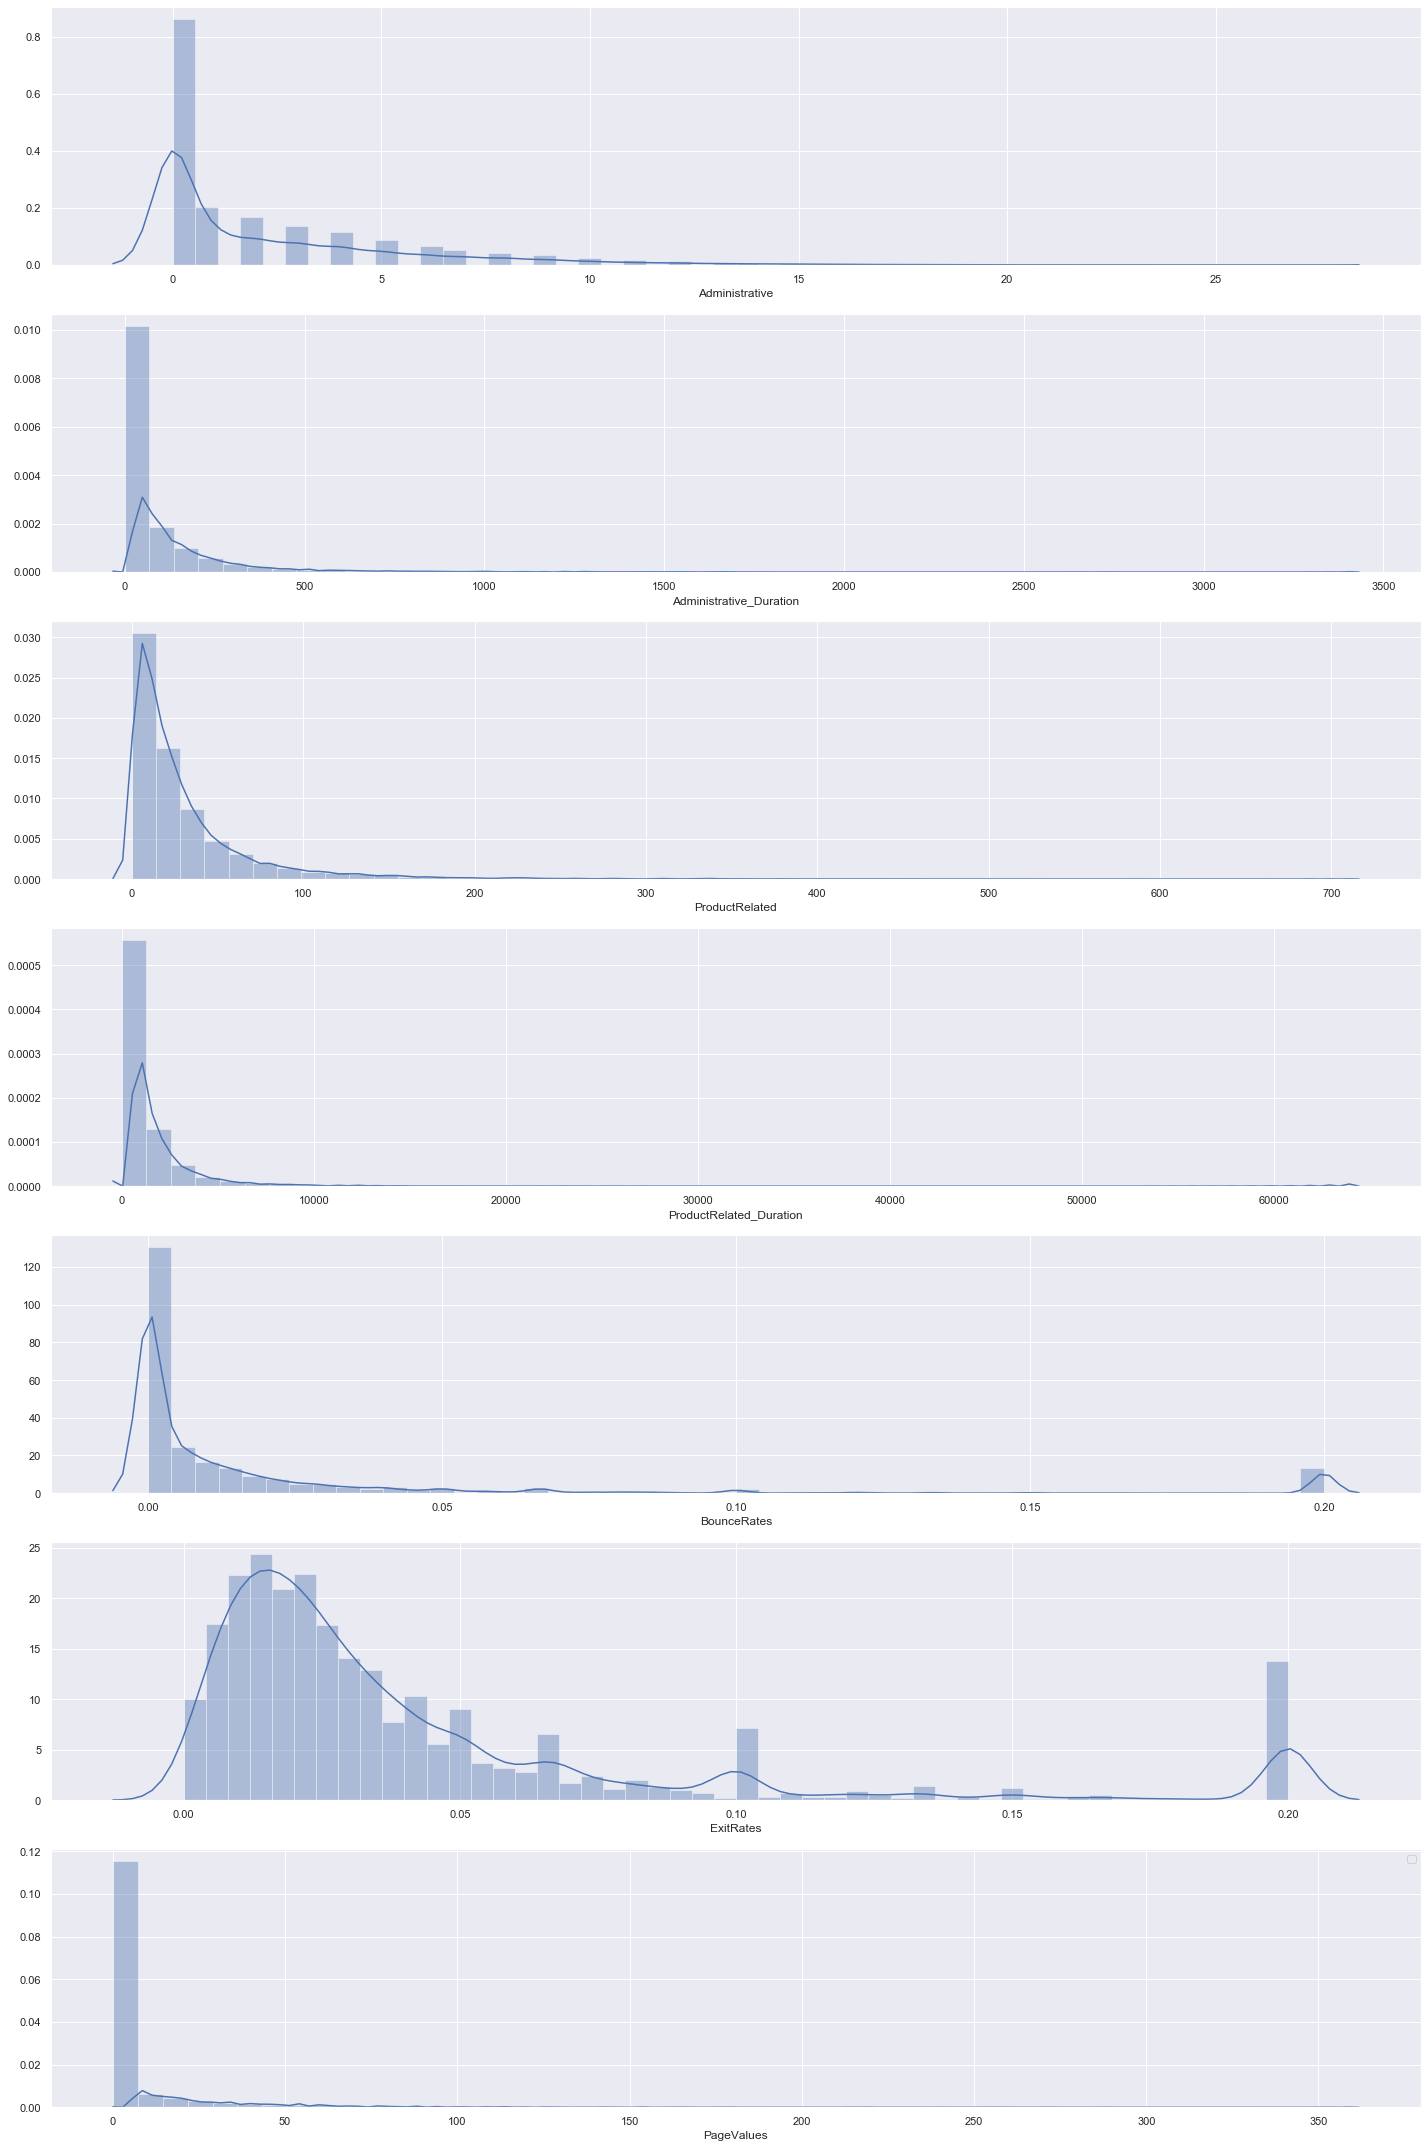

In [68]:
numeric = ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']
fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7) = plt.subplots(7,1, figsize=(20,30))
sns.distplot(Df_for_cluster["Administrative"], ax=ax1)
sns.distplot(Df_for_cluster["Administrative_Duration"], ax=ax2)
sns.distplot(Df_for_cluster["ProductRelated"], ax=ax3)
sns.distplot(Df_for_cluster["ProductRelated_Duration"], ax=ax4)
sns.distplot(Df_for_cluster["BounceRates"], ax=ax5)
sns.distplot(Df_for_cluster["ExitRates"], ax=ax6)
sns.distplot(Df_for_cluster["PageValues"], ax=ax7)
plt.tight_layout()
plt.legend()

<b>The above graphs shows Positive Skewness which means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.</b>

##### We can use logarithmic transformation to reduce the outliers and distribution skewness. As we have 0 values which will result in inf value on log transform. To handle it we can add 1 in the values.

No handles with labels found to put in legend.


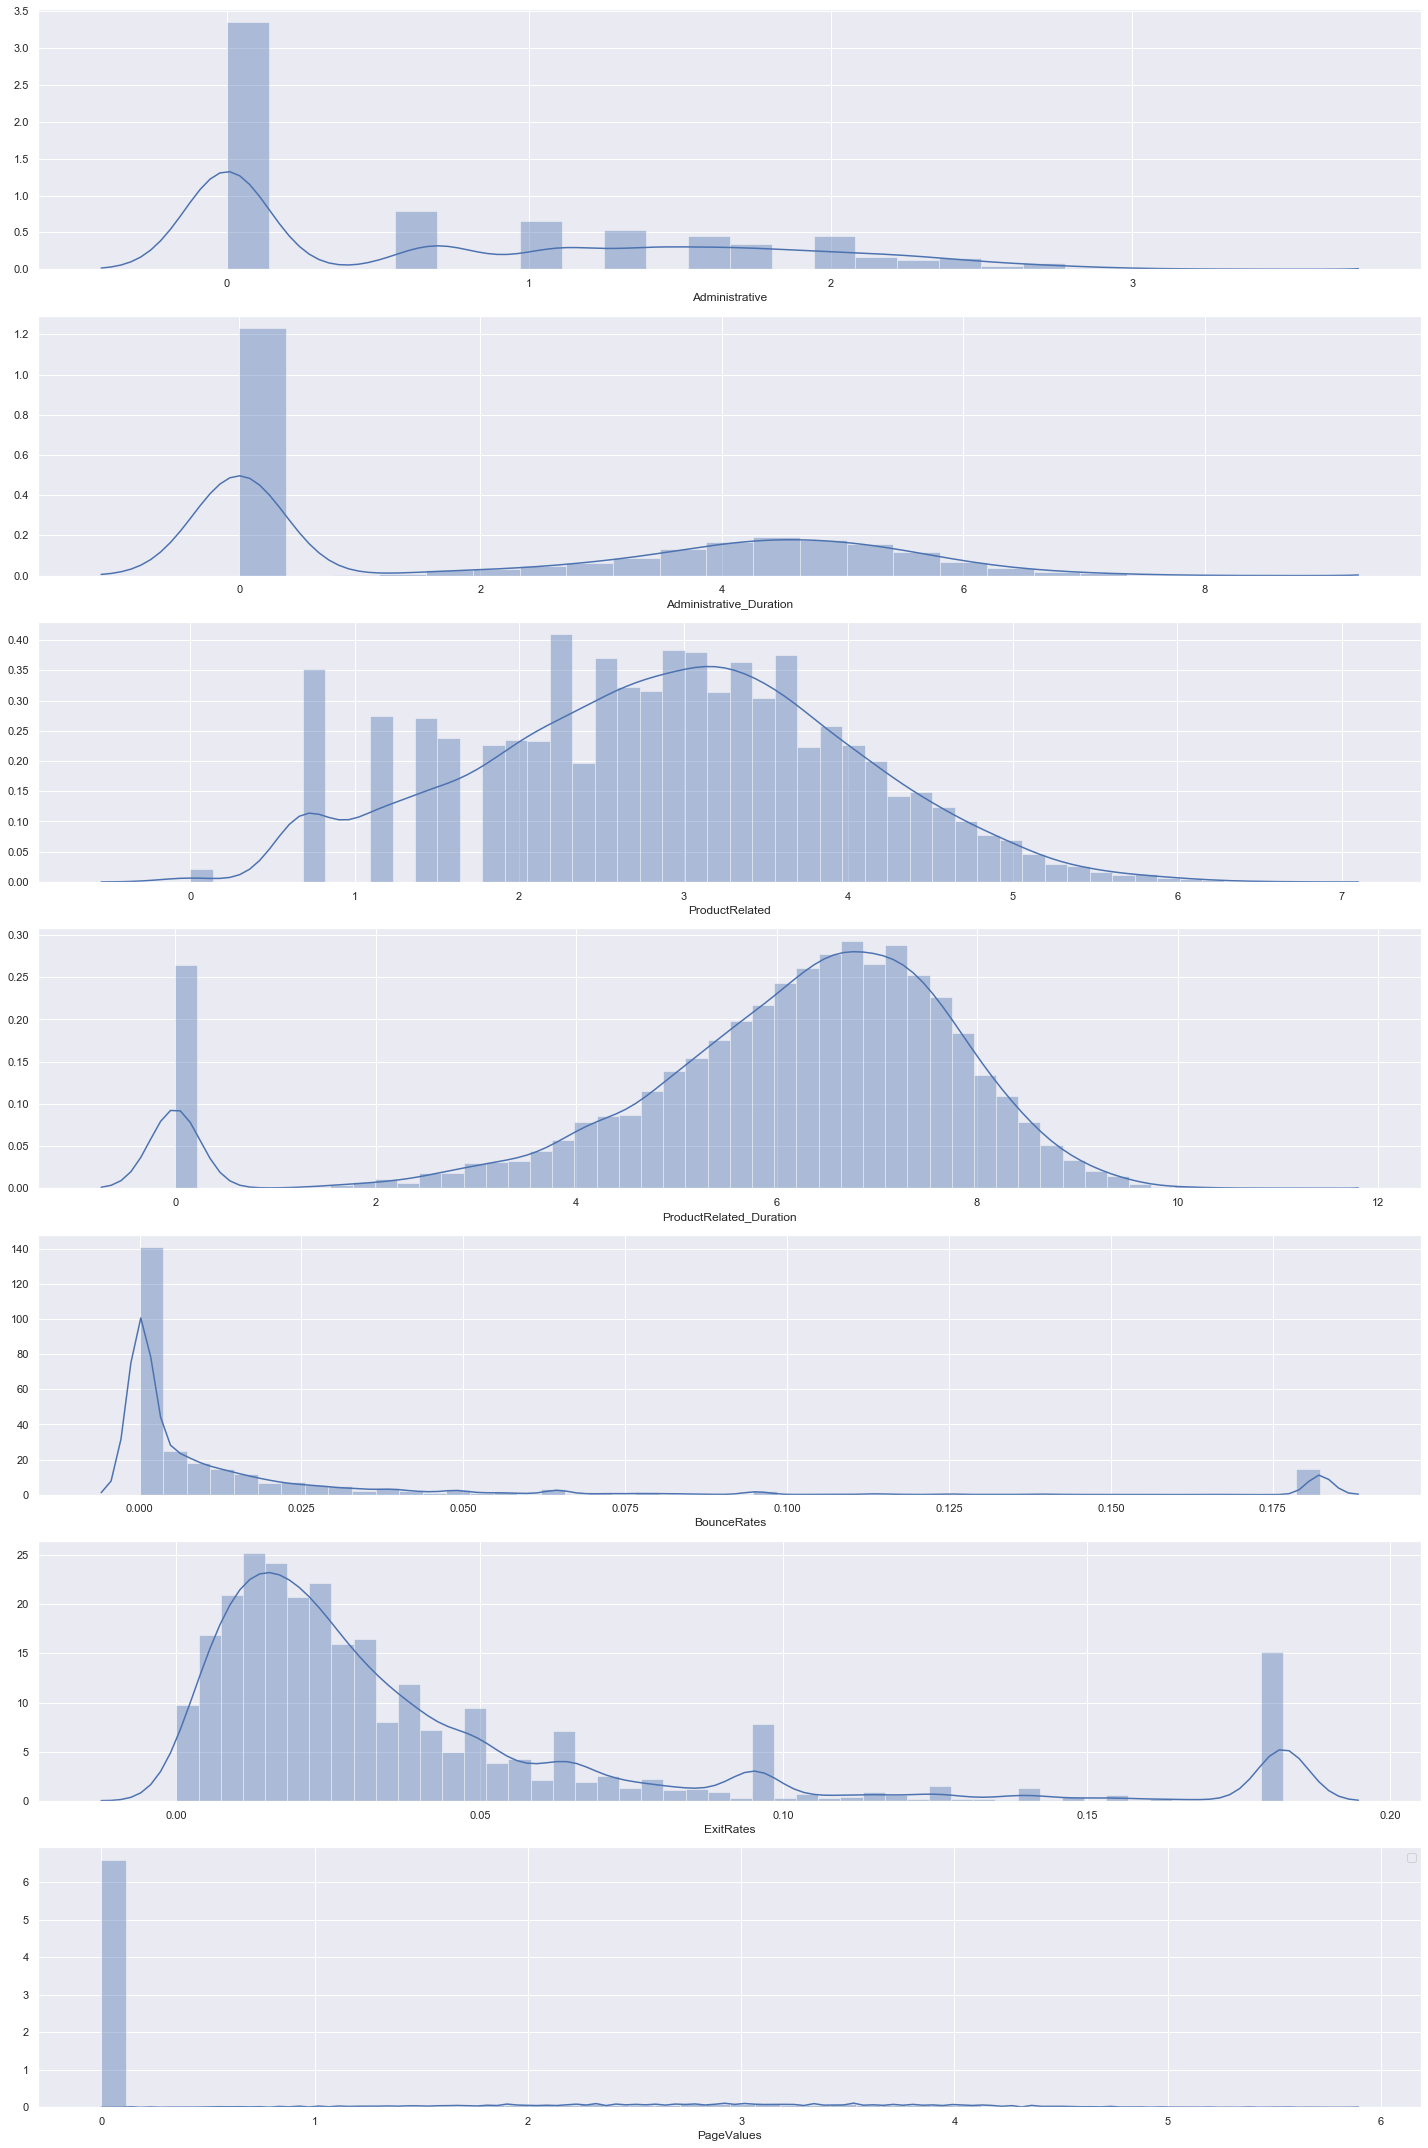

In [69]:
Df_for_cluster_log = np.log(Df_for_cluster[numeric]+1)

fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7) = plt.subplots(7,1, figsize=(20,30))
sns.distplot(Df_for_cluster_log["Administrative"], ax=ax1)
sns.distplot(Df_for_cluster_log["Administrative_Duration"], ax=ax2)
sns.distplot(Df_for_cluster_log["ProductRelated"], ax=ax3)
sns.distplot(Df_for_cluster_log["ProductRelated_Duration"], ax=ax4)
sns.distplot(Df_for_cluster_log["BounceRates"], ax=ax5)
sns.distplot(Df_for_cluster_log["ExitRates"], ax=ax6)
sns.distplot(Df_for_cluster_log["PageValues"], ax=ax7)
plt.tight_layout()
plt.legend()


In [70]:
Df_for_cluster_log.head()

Administrative  Administrative_Duration  ProductRelated  \
0             0.0                      0.0        0.693147   
1             0.0                      0.0        1.098612   
3             0.0                      0.0        1.098612   
4             0.0                      0.0        2.397895   
5             0.0                      0.0        2.995732   

   ProductRelated_Duration  BounceRates  ExitRates  PageValues  
0                 0.000000     0.182322   0.182322         0.0  
1                 4.174387     0.000000   0.095310         0.0  
3                 1.299283     0.048790   0.131028         0.0  
4                 6.443336     0.019803   0.048790         0.0  
5                 5.044822     0.015666   0.024265         0.0

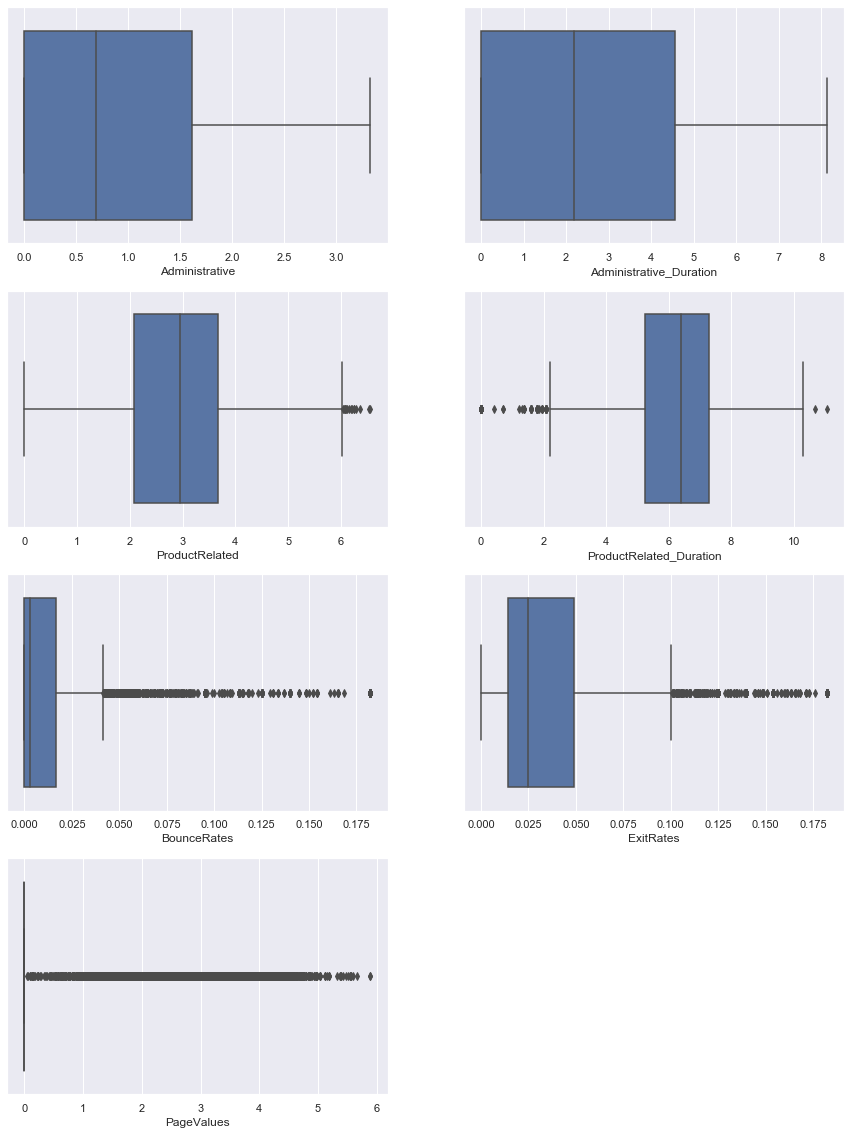

In [71]:
fig = plt.figure(figsize = (15,20))
axes = 420
for num in numeric:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = Df_for_cluster_log, x = num)
plt.show()

<b>The above result shows that outliers from features administrative and administrative_duration is removed where product related and productrelated duration and exit rates are better and remaining are in worst condition. Thats why i am considering those features which have least number of outliers </b>

In [72]:
# Here we normalize the data and select feature that has low noise
from sklearn.preprocessing import StandardScaler
Df_for_cluster_log1 =  Df_for_cluster_log[['ProductRelated','Administrative_Duration','ExitRates' ]]

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(Df_for_cluster_log1)
cluster_scaled

array([[-1.96652395, -0.97891069,  3.22323578],
       [-1.60410242, -0.97891069,  1.24243872],
       [-1.60410242, -0.97891069,  2.05555392],
       ...,
       [-0.84675245, -0.97891069,  0.96481571],
       [-0.10783286,  0.85217914, -0.45299502],
       [-1.34696025, -0.97891069,  0.54192791]])

### 5) Clustering

In [73]:
# importing packages for clustering algorithms
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, estimate_bandwidth
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#from yellowbrick.cluster import KElbowVisualizer
import pylab
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import calinski_harabasz_score, silhouette_score

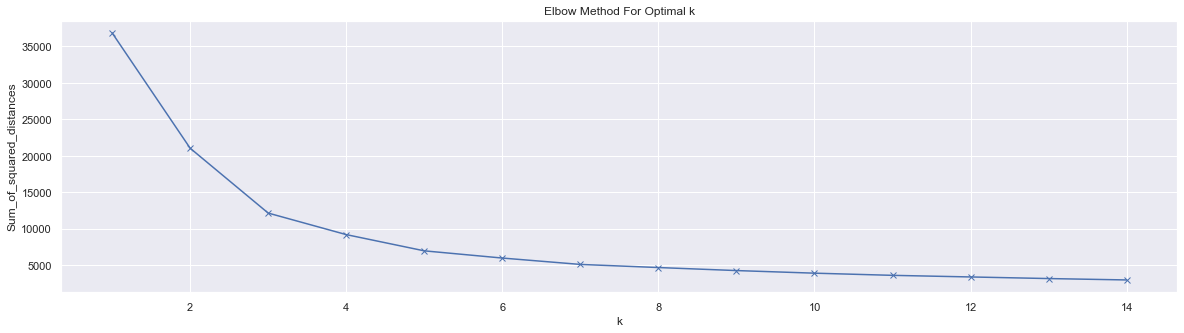

In [74]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### K-MEANS Algorithm

K-Means


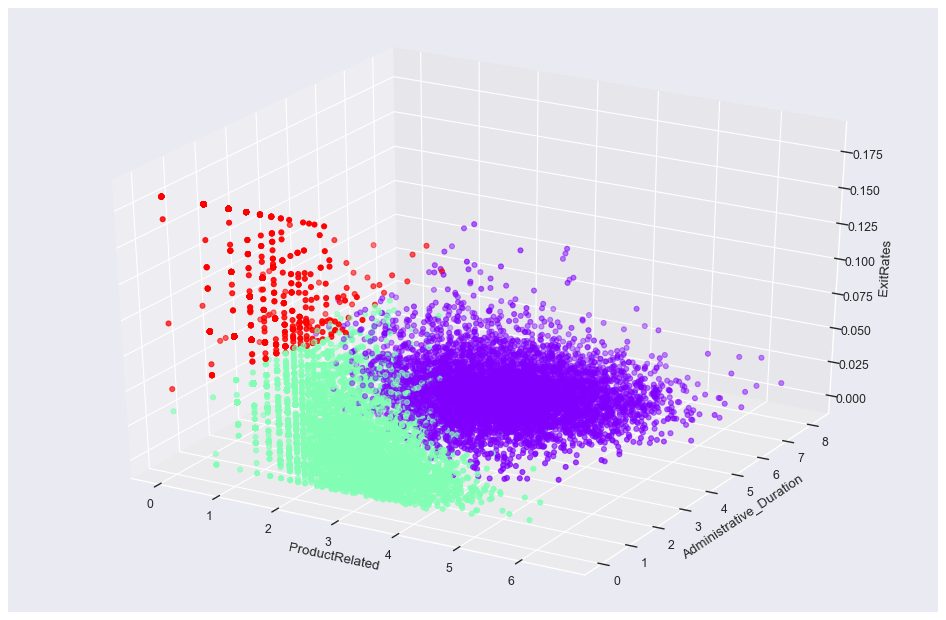

In [75]:
# Using K means algo initially
model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(
             Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("K-Means")


In [76]:
print("Internal Validation")
print("DB For K mean:"+str(davies_bouldin_score(cluster_scaled, kmeans_labels)) )
print("Calinski Score For K mean:"+ str(calinski_harabasz_score(cluster_scaled, kmeans_labels)))
print("Silhoutte ScoreK mean:"+ str(silhouette_score(cluster_scaled, kmeans_labels,sample_size=300))) 

Internal Validation
DB For K mean:0.8039294201665187
Calinski Score For K mean:12486.85824899695
Silhoutte ScoreK mean:0.4637874797063252


In [77]:
print("External Validation")
Labels_given = y
print(adjusted_mutual_info_score(Labels_given, kmeans_labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,kmeans_labels))

External Validation
0.022664620945248914
(0.05073092789908476, 0.022747281890377172, 0.0314104200629663)


In [78]:
clustered_kmeans = Df_for_cluster_log1.assign(Cluster=kmeans_labels)
grouped_kmeans = clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   3.4                      4.6        0.0
1                   2.8                      0.2        0.0
2                   1.2                      0.1        0.1

#### Mini Batch K-MEANS

Mini Batch K-Means (batch size = 10)


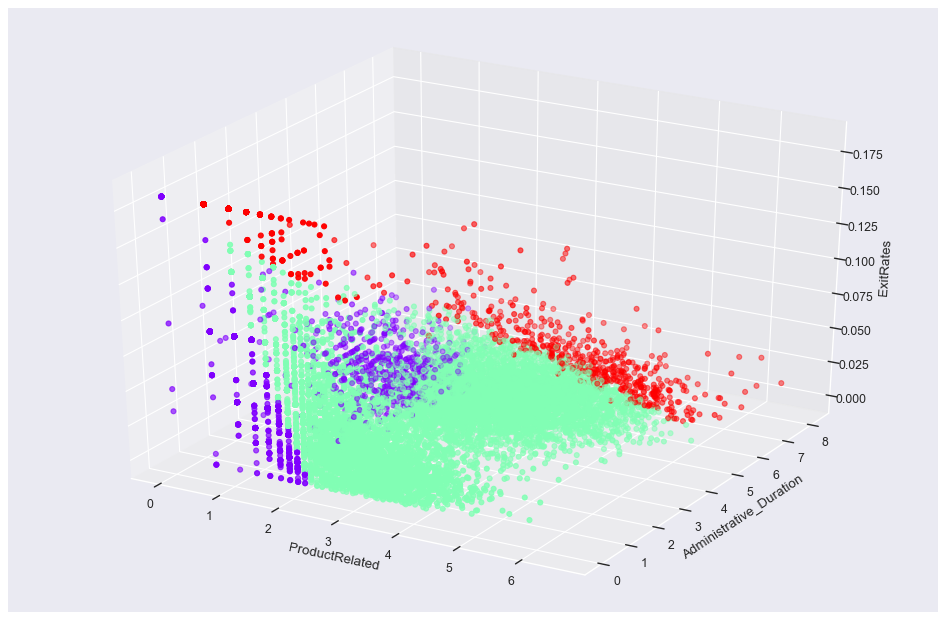

In [79]:
# Lets try mini-batch k means with multiple batch sizes. Start with batch size = 10
from sklearn.metrics.pairwise import pairwise_distances_argmin 

batch_size = 10
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(
             Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mini Batch K-Means (batch size = 10)")

In [80]:
print("Internal Validation")
print("DB for Mini Batch KMean:"+str(davies_bouldin_score(cluster_scaled, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch KMean:"+ str(silhouette_score(cluster_scaled, mbk_means_labels,sample_size=3000))) 
print("Calinski Score for Mini Batch KMean:"+ str(calinski_harabasz_score(cluster_scaled, mbk_means_labels)))


Internal Validation
DB for Mini Batch KMean:1.8050516029581356
Silhoutte Score for Mini Batch KMean:0.213343784501443
Calinski Score for Mini Batch KMean:1973.9533263318206


In [81]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,mbk_means_labels))

External Validation
0.010574051249188235
(0.01740338857224118, 0.010688702859134296, 0.013243559999450802)


In [82]:
clustered_MiniBatchkmeans = Df_for_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans = clustered_MiniBatchkmeans.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   1.5                      1.5        0.0
1                   3.2                      2.5        0.0
2                   2.3                      2.4        0.1

Mini Batch K-Means (batch size = 50)


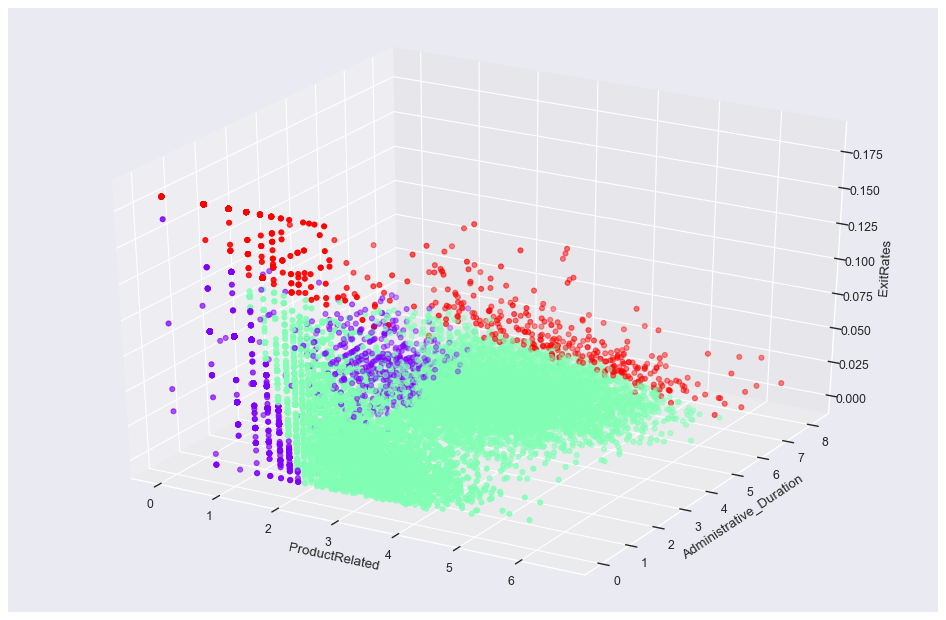

In [83]:
# Now batch size = 50


batch_size = 50
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(
             Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mini Batch K-Means (batch size = 50)")

In [84]:
print("Internal Validation")
print("DB for Mini Batch KMean:"+str(davies_bouldin_score(cluster_scaled, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch KMean:"+ str(silhouette_score(cluster_scaled, mbk_means_labels,sample_size=3000))) 
print("Calinski Score for Mini Batch KMean:"+ str(calinski_harabasz_score(cluster_scaled, mbk_means_labels)))


Internal Validation
DB for Mini Batch KMean:1.3998632461646967
Silhoutte Score for Mini Batch KMean:0.2418988736171807
Calinski Score for Mini Batch KMean:2915.5623981343383


In [85]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,mbk_means_labels))

External Validation
0.01701631513720357
(0.02624417772190167, 0.01713742983149589, 0.020734951033836154)


In [86]:
clustered_MiniBatchkmeans1 = Df_for_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans1 = clustered_MiniBatchkmeans1.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans1

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   1.4                      1.3        0.1
1                   3.2                      2.5        0.0
2                   1.8                      1.7        0.1

Mini Batch K-Means (Batch_size = 150)


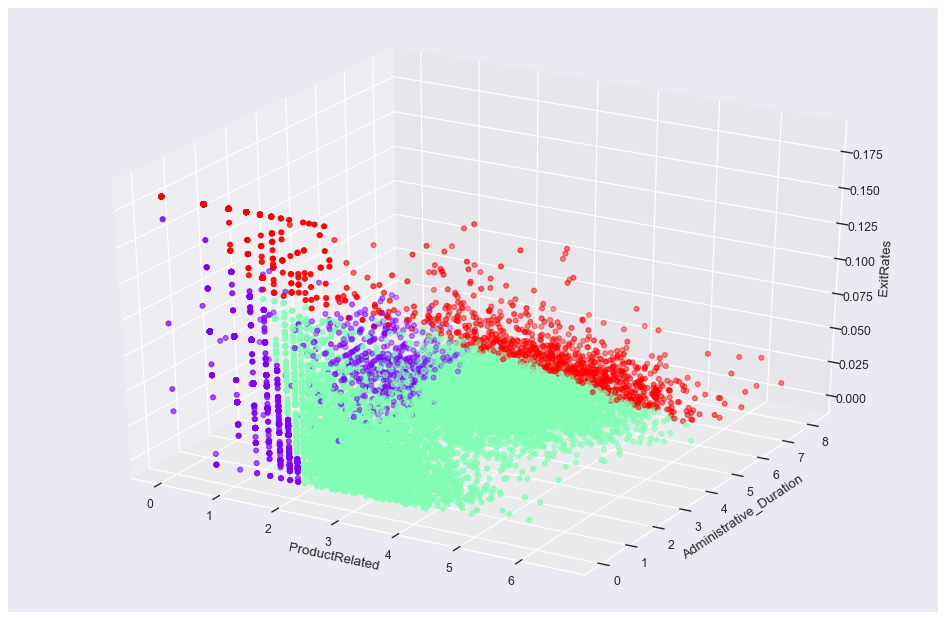

In [87]:
# Now batch size = 150


batch_size = 150
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(
             Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mini Batch K-Means (Batch_size = 150)")

In [88]:
print("Internal Validation")
print("DB for Mini Batch KMean:"+str(davies_bouldin_score(cluster_scaled, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch KMean:"+ str(silhouette_score(cluster_scaled, mbk_means_labels,sample_size=3000))) 
print("Calinski Score for Mini Batch KMean:"+ str(calinski_harabasz_score(cluster_scaled, mbk_means_labels)))


Internal Validation
DB for Mini Batch KMean:2.0400857099765113
Silhoutte Score for Mini Batch KMean:0.2064878191207051
Calinski Score for Mini Batch KMean:2076.0113566637788


In [89]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,mbk_means_labels))

External Validation
0.010760116867208807
(0.019911178536310217, 0.010861918044923131, 0.014056017331133734)


In [90]:
clustered_MiniBatchkmeans2 = Df_for_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans2 = clustered_MiniBatchkmeans2.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans2

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   1.5                      1.3        0.1
1                   3.3                      2.4        0.0
2                   2.5                      2.9        0.1

Mini Batch K-Means (Batch_size = 200)


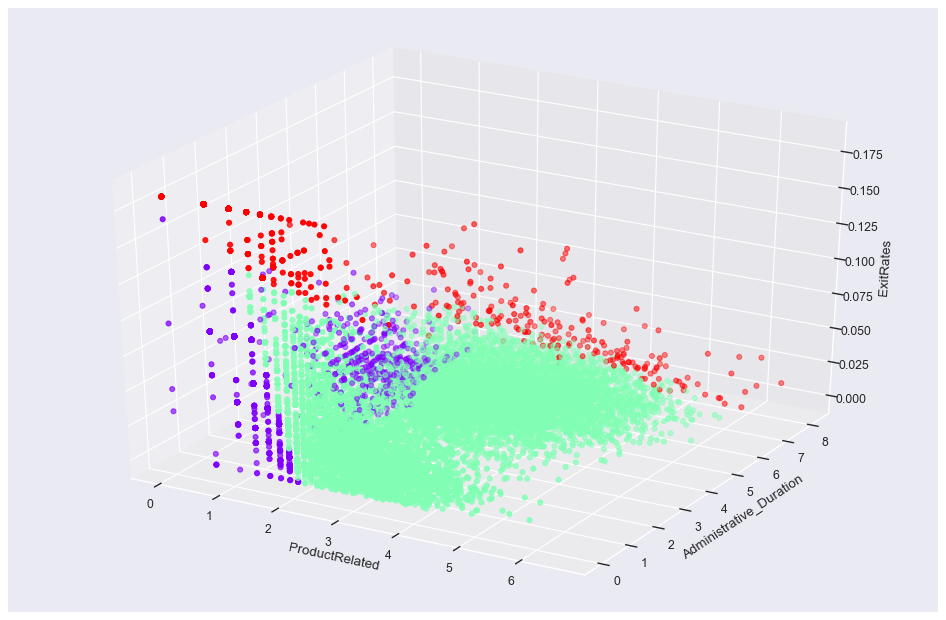

In [91]:
# Now batch size = 200


batch_size = 200
# perform the mini batch K-means 
mbk = MiniBatchKMeans(init ='k-means++', n_clusters = 3, 
                      batch_size = batch_size, 
                      verbose = 0) 
  
mbk.fit(cluster_scaled) 
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis = 0) 
mbk_means_labels = pairwise_distances_argmin(cluster_scaled, mbk_means_cluster_centers) 


fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(
             Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=mbk_means_labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)
print("Mini Batch K-Means (Batch_size = 200)")

In [92]:
print("Internal Validation")
print("DB for Mini Batch KMean:"+str(davies_bouldin_score(cluster_scaled, mbk_means_labels)) )
print("Silhoutte Score for Mini Batch KMean:"+ str(silhouette_score(cluster_scaled, mbk_means_labels,sample_size=3000))) 
print("Calinski Score for Mini Batch KMean:"+ str(calinski_harabasz_score(cluster_scaled, mbk_means_labels)))


Internal Validation
DB for Mini Batch KMean:1.2273684999306413
Silhoutte Score for Mini Batch KMean:0.2581870677593685
Calinski Score for Mini Batch KMean:3371.22738917744


In [93]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given, mbk_means_labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,mbk_means_labels))

External Validation
0.019089839890920543
(0.027753209609143886, 0.01921801386050348, 0.022710141552375863)


In [94]:
clustered_MiniBatchkmeans2 = Df_for_cluster_log1.assign(Cluster=mbk_means_labels)
grouped_MiniBatchkmeans2 = clustered_MiniBatchkmeans2.groupby(['Cluster']).mean().round(1)
grouped_MiniBatchkmeans2

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   1.4                      1.3        0.1
1                   3.2                      2.6        0.0
2                   1.5                      1.2        0.2

#### MEAN SHIFT

bandwidth: 1.2535282085167276
number of estimated clusters: 3
Mean shift (quantile=0.2)


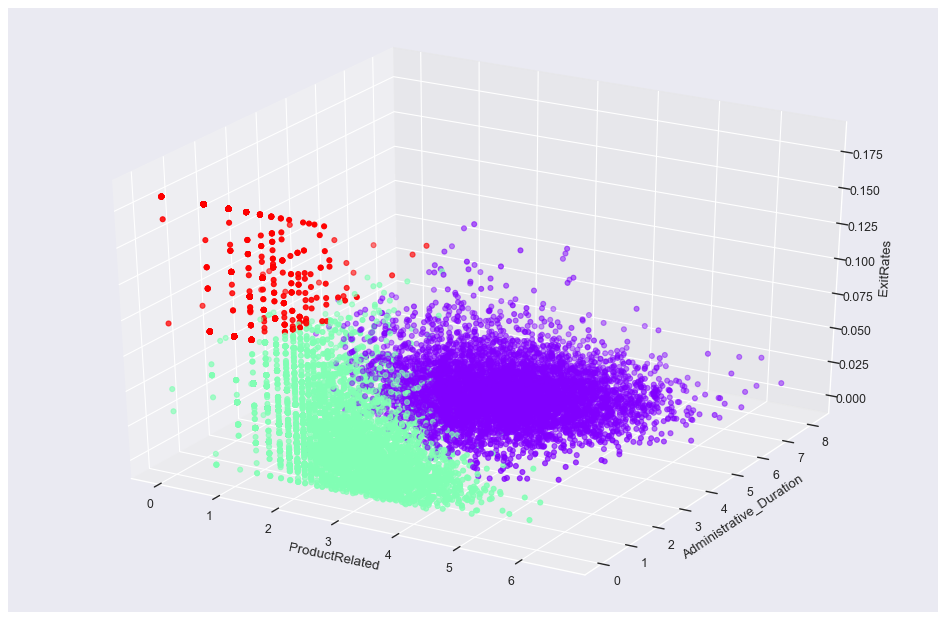

In [95]:
# Lets try mean-shift with multiple quantiles. Start with quantile=0.2
bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.2)
print(f"bandwidth: {bandwidth}")
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"number of estimated clusters: {n_clusters_}")

print("Mean shift (quantile=0.2)")



In [96]:
print("Internal Validation")
print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Mean Shift Model:0.7952488297273895
Silhoutte Score for Mean Shift:0.4532142747851629
Calinski Score for Mean Shift:12364.34152685712


In [97]:

print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))


External Validation
0.024659980930085187
(0.05428460433058926, 0.024743842917754406, 0.03399306880439064)


In [98]:
clustered_meanshift = Df_for_cluster_log1.assign(Cluster=labels)
grouped_meanshift = clustered_meanshift.groupby(['Cluster']).mean().round(2)
print(grouped_meanshift)

         ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                  3.41                     4.58       0.02
1                  2.73                     0.19       0.04
2                  1.08                     0.04       0.15


bandwidth: 1.5576556377134032
number of estimated clusters: 2
Mean shift (quantile=0.3)


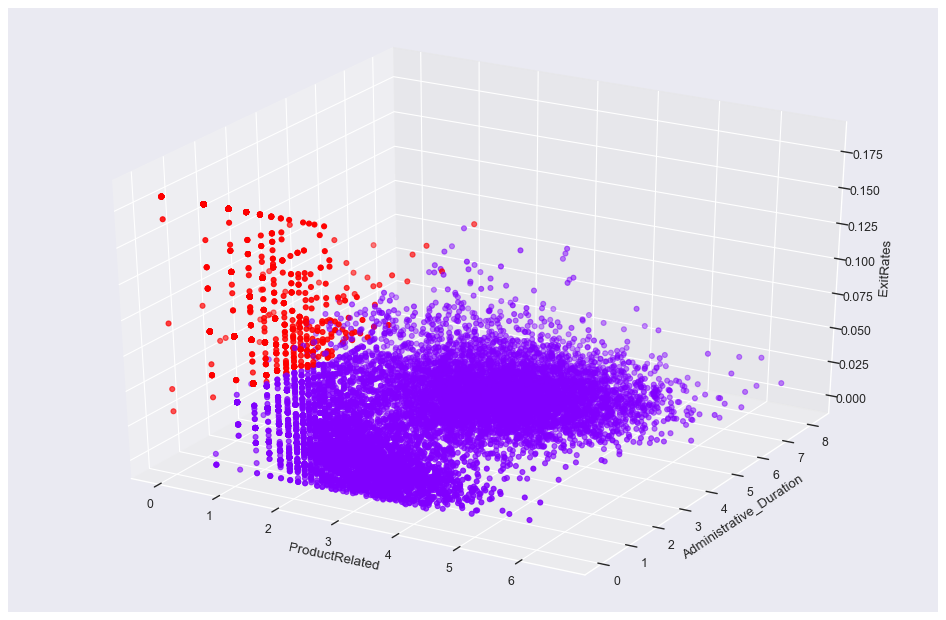

In [99]:
# Now quantile=0.3
bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.3)
print(f"bandwidth: {bandwidth}")
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"number of estimated clusters: {n_clusters_}")

print("Mean shift (quantile=0.3)")



In [100]:
print("Internal Validation")
print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Mean Shift Model:0.7545936859884892
Silhoutte Score for Mean Shift:0.4734988662503732
Calinski Score for Mean Shift:8084.787738993873


In [101]:

print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))


External Validation
0.04254097951444825
(0.042631290840619056, 0.046414229817511594, 0.044442404645830935)


In [102]:
clustered_meanshift1 = Df_for_cluster_log1.assign(Cluster=labels)
grouped_meanshift1 = clustered_meanshift1.groupby(['Cluster']).mean().round(2)
print(grouped_meanshift1)

         ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                  3.15                     2.67       0.03
1                  1.25                     0.07       0.13


bandwidth: 0.8761279463563543
number of estimated clusters: 3
Mean shift (quantile=0.1)


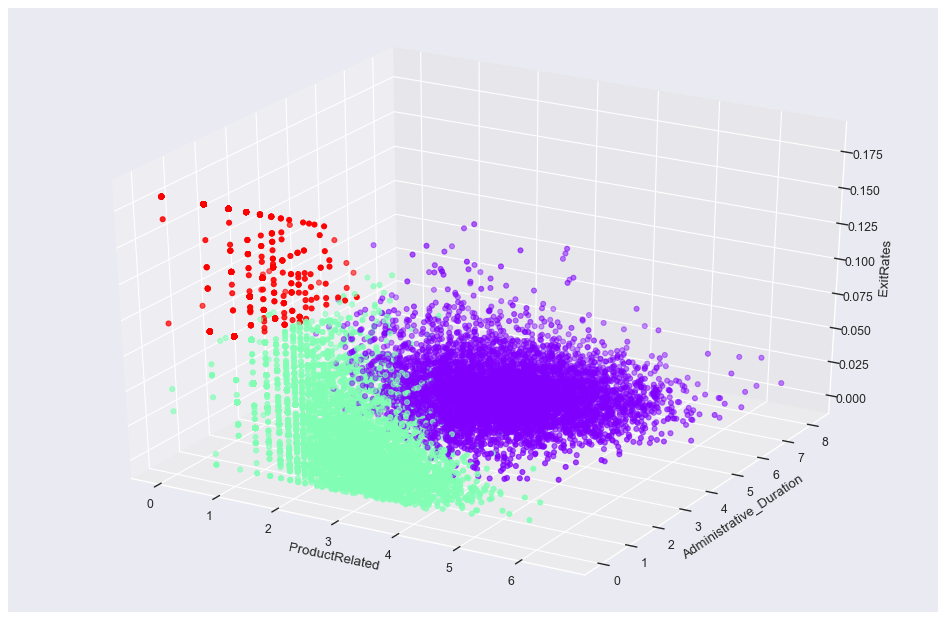

In [103]:
# Now quantile=0.1
bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.1)
print(f"bandwidth: {bandwidth}")
analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")


ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"number of estimated clusters: {n_clusters_}")

print("Mean shift (quantile=0.1)")


In [104]:
print("Internal Validation")
print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Mean Shift:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Mean Shift:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Mean Shift Model:0.7914240055145587
Silhoutte Score for Mean Shift:0.4563521947475514
Calinski Score for Mean Shift:12260.136681995738


In [105]:

print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))


External Validation
0.023980896999703225
(0.05243851846338685, 0.024065391297281042, 0.03299056139271709)


In [106]:
clustered_meanshift3 = Df_for_cluster_log1.assign(Cluster=labels)
grouped_meanshift3= clustered_meanshift3.groupby(['Cluster']).mean().round(2)
print(grouped_meanshift3)

         ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                  3.41                     4.57       0.02
1                  2.71                     0.17       0.04
2                  1.06                     0.03       0.15


#### Gaussain Mixture Model 

Gaussian Mixture Model (covariance_type='full')


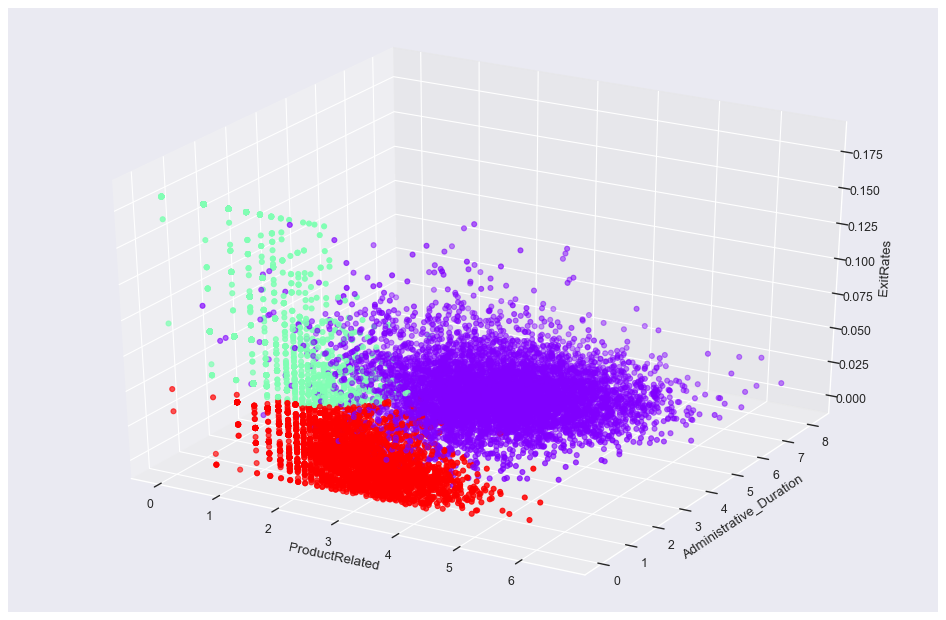

In [107]:
# Lets try gmm with multiple covariance_type. Start with covariance_type='full',
from sklearn.mixture import GaussianMixture

analyzer = GaussianMixture(n_components=3,covariance_type='full', random_state=53)
labels = analyzer.fit_predict(cluster_scaled)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

print("Gaussian Mixture Model (covariance_type='full')")

In [108]:
print(f"Means: {analyzer.means_}\n")
print(f"Covariance: {analyzer.covariances_}")

Means: [[ 0.39514401  0.89222874 -0.4203614 ]
 [-1.09871526 -0.97891069  1.52723112]
 [ 0.03411413 -0.97891069 -0.28825791]]

Covariance: [[[ 7.81590293e-01  8.37576055e-02 -8.92075940e-02]
  [ 8.37576055e-02  2.41967231e-01 -2.57331448e-02]
  [-8.92075940e-02 -2.57331448e-02  1.43411622e-01]]

 [[ 5.34744267e-01  5.84603747e-30 -6.33317090e-01]
  [ 5.84669000e-30  1.00000000e-06 -8.28977118e-30]
  [-6.33317090e-01 -8.24670404e-30  1.59692156e+00]]

 [[ 5.93596027e-01 -8.68880024e-31 -7.34581302e-02]
  [-8.87230183e-31  1.00000000e-06  6.75377598e-30]
  [-7.34581302e-02  6.79414633e-30  1.27824593e-01]]]


In [109]:
print("Internal Validation")
print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Gaussian Mixture Model:0.8473386557677731
Silhoutte Score for Gaussian Mixture Model:0.41754517466198526
Calinski Score for Gaussian Mixture Model:10548.264152415408


In [110]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))

External Validation
0.02629872161856841
(0.06119025915690283, 0.026377887443443045, 0.036864312683066836)


In [111]:
clustered_GMM = Df_for_cluster_log1.assign(Cluster=labels)
grouped_gmm = clustered_GMM.groupby(['Cluster']).mean().round(1)
grouped_gmm

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   3.3                      4.4        0.0
1                   1.5                      0.0        0.1
2                   2.9                      0.0        0.0

Gaussian Mixture Model (covariance_type='tied')


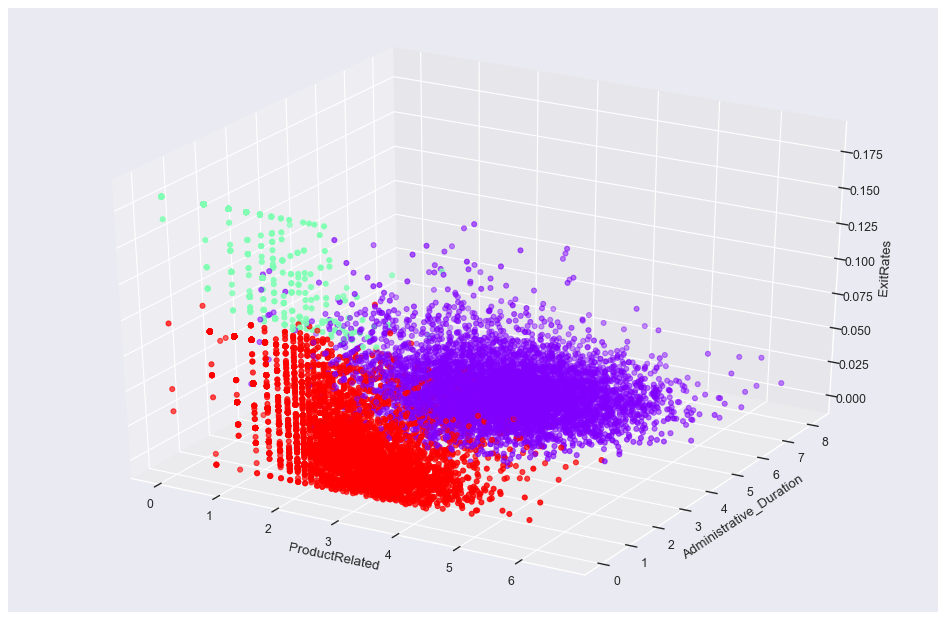

In [112]:
# Lets try gmm with multiple covariance_type. Start with covariance_type='tied',
from sklearn.mixture import GaussianMixture

analyzer = GaussianMixture(n_components=3,covariance_type='tied', random_state=53)
labels = analyzer.fit_predict(cluster_scaled)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

print("Gaussian Mixture Model (covariance_type='tied')")

In [113]:
print(f"Means: {analyzer.means_}\n")
print(f"Covariance: {analyzer.covariances_}")

Means: [[ 0.40186998  0.95282394 -0.43051034]
 [-1.5657537  -0.97318015  2.8416149 ]
 [-0.16556422 -0.92534198 -0.04909695]]

Covariance: [[ 0.70681426  0.05101874 -0.16366474]
 [ 0.05101874  0.11073315 -0.01371203]
 [-0.16366474 -0.01371203  0.24298586]]


In [114]:
print("Internal Validation")
print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Gaussian Mixture Model:0.783061655590954
Silhoutte Score for Gaussian Mixture Model:0.4506513763531185
Calinski Score for Gaussian Mixture Model:11304.950446368242


In [115]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))

External Validation
0.02294506543958614
(0.04889701670080568, 0.023031887175814298, 0.03131399232271423)


In [116]:
clustered_GMM1 = Df_for_cluster_log1.assign(Cluster=labels)
grouped_gmm1 = clustered_GMM1.groupby(['Cluster']).mean().round(1)
grouped_gmm1

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   3.3                      4.6        0.0
1                   1.1                      0.0        0.2
2                   2.7                      0.1        0.0

Gaussian Mixture Model (covariance_type='diag')


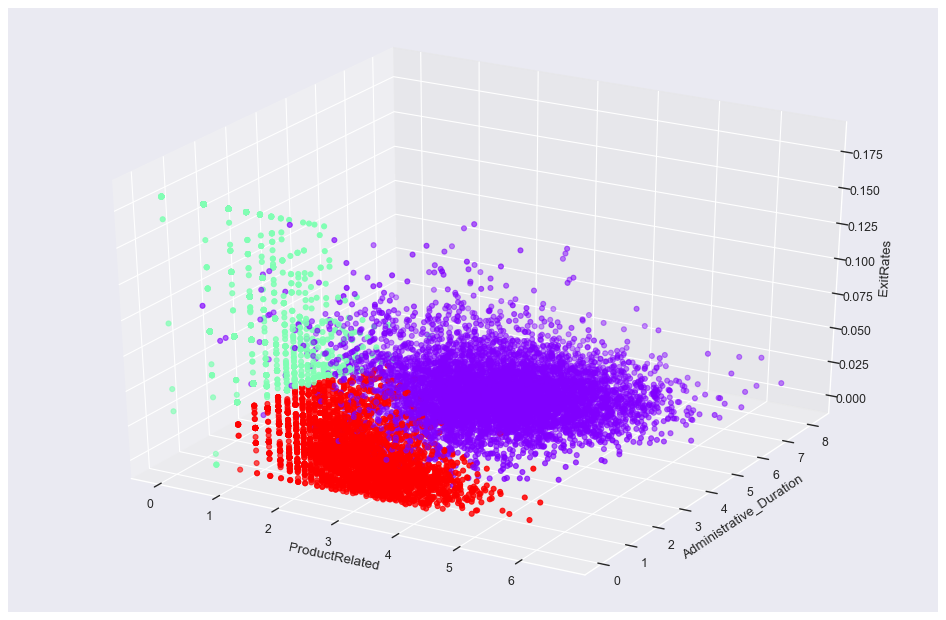

In [117]:
# Now covariance_type='diag',
from sklearn.mixture import GaussianMixture

analyzer = GaussianMixture(n_components=3,covariance_type='diag', random_state=53)
labels = analyzer.fit_predict(cluster_scaled)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

print("Gaussian Mixture Model (covariance_type='diag')")

In [118]:
print(f"Means: {analyzer.means_}\n")
print(f"Covariance: {analyzer.covariances_}")

Means: [[ 0.39514522  0.89222855 -0.42036176]
 [-1.32982673 -0.97891069  1.82791549]
 [ 0.02645393 -0.97891069 -0.24021424]]

Covariance: [[7.81589954e-01 2.41967554e-01 1.43411450e-01]
 [3.54037555e-01 9.99999996e-07 1.36476572e+00]
 [5.26616881e-01 1.00000000e-06 1.69074639e-01]]


In [119]:
print("Internal Validation")
print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Gaussian Mixture Model:0.8303237700818825
Silhoutte Score for Gaussian Mixture Model:0.43285817570757534
Calinski Score for Gaussian Mixture Model:11171.13198897013


In [120]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))

External Validation
0.025765904712661696
(0.05933768391388967, 0.025845941193939136, 0.03600781927469277)


In [121]:
clustered_GMM2 = Df_for_cluster_log1.assign(Cluster=labels)
grouped_gmm2 = clustered_GMM2.groupby(['Cluster']).mean().round(1)
grouped_gmm2

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   3.3                      4.4        0.0
1                   1.4                      0.0        0.1
2                   2.9                      0.0        0.0

Gaussian Mixture Model (covariance_type='spherical')


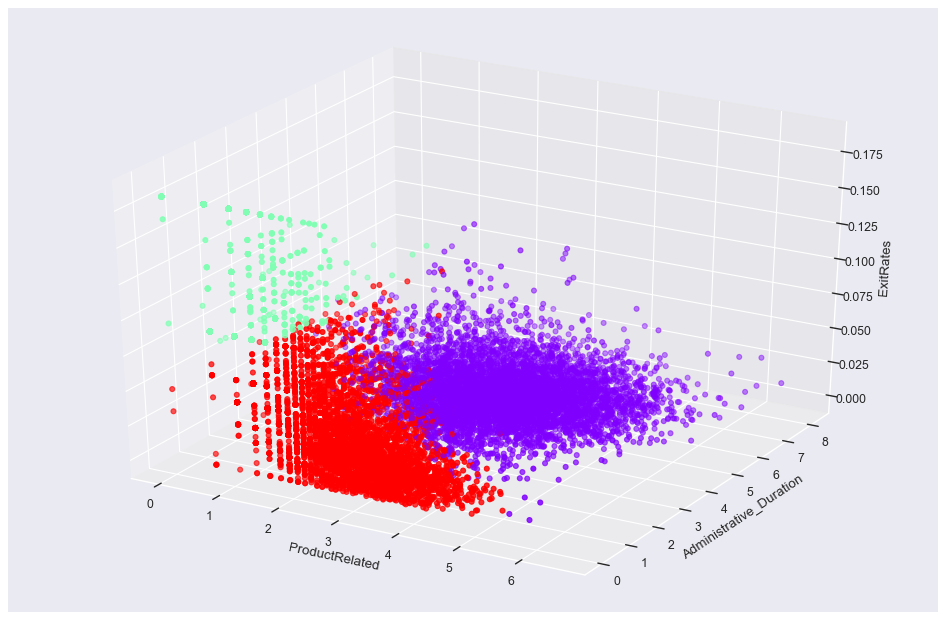

In [122]:
# Now covariance_type='spherical',
from sklearn.mixture import GaussianMixture

analyzer = GaussianMixture(n_components=3,covariance_type='spherical', random_state=53)
labels = analyzer.fit_predict(cluster_scaled)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(Df_for_cluster_log1['ProductRelated'],Df_for_cluster_log1['Administrative_Duration'],
             Df_for_cluster_log1['ExitRates'],  c=labels, cmap='rainbow')

xLabel = ax.set_xlabel('ProductRelated', linespacing=3.2)
yLabel = ax.set_ylabel('Administrative_Duration', linespacing=3.1)
zLabel = ax.set_zlabel('ExitRates', linespacing=3.4)

print("Gaussian Mixture Model (covariance_type='spherical')")

In [123]:
print(f"Means: {analyzer.means_}\n")
print(f"Covariance: {analyzer.covariances_}")

Means: [[ 0.4791571   0.93815199 -0.44935479]
 [-1.60154967 -0.95628387  2.51098053]
 [-0.16323027 -0.86272052 -0.09838308]]

Covariance: [0.35957554 0.32177818 0.3345228 ]


In [124]:
print("Internal Validation")
print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, labels,sample_size=3000))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(calinski_harabasz_score(cluster_scaled, labels)))

Internal Validation
DB for Gaussian Mixture Model:0.796950821085555
Silhoutte Score for Gaussian Mixture Model:0.46530779631785335
Calinski Score for Gaussian Mixture Model:12420.201599892123


In [125]:
print("External Validation")
print(adjusted_mutual_info_score(Labels_given,labels))
print(metrics.homogeneity_completeness_v_measure(Labels_given,labels))

External Validation
0.02373902299880276
(0.052484212848407555, 0.02382261019516904, 0.03277061982711244)


In [126]:
clustered_GMM3 = Df_for_cluster_log1.assign(Cluster=labels)
grouped_gmm3 = clustered_GMM3.groupby(['Cluster']).mean().round(1)
grouped_gmm3

ProductRelated  Administrative_Duration  ExitRates
Cluster                                                    
0                   3.4                      4.6        0.0
1                   1.1                      0.1        0.2
2                   2.7                      0.2        0.0